<a href="https://colab.research.google.com/github/breno-xp/Curso-Pytorch/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas
import numpy as np
import matplotlib.pyplot as plt

from torch import nn # Neural Network | Building blocks for neural networks / graphs

# Important things
* classification / identification of image
* segmentation
* imagens entrada / anotadas (input)
* torch saves the state, and os it is important for optimizer and etc
* Evaluation to save the best version of a model (after train and before test)

# Chapter 0 - Fundamentals

## Introduction

In [ ]:
# test_essentialS = torch.tensor([1, 2, 3], [])
# The firt array is the matrix, there should be only 1

In [ ]:
#matrix_err = torch.tensor([[[1, 2, 3],
                          #[4, 5]]])
# The arrays must have the same number os elements

In [ ]:
test_1 = torch.tensor([1, 2, 3])

test_1.shape
# Inside the matrix (dim = 0) there is 3 items

torch.Size([3])

In [ ]:
test_1.ndim

1

In [ ]:
test_2 = torch.tensor([[1, 2], [2, 3], [3, 4]])

test_2.shape
# Inside the dim = 0 there is 3 arrays, inside those (dim = 1) there are 2 items

torch.Size([3, 2])

In [ ]:
test_2.ndim

2

In [ ]:
test_3 = torch.tensor([[[], []] , [[], []], [[], []]])

test_3.shape
# Inside the dim = 0 there is 3 arrays, inside those (dim = 1) there are 2 arrays (dim = 2), each with 0 items

torch.Size([3, 2, 0])

In [ ]:
test_3.ndim

3

In [ ]:
test_4 = torch.tensor([[[1], [1]] , [[1], [1]], [[1], [1]]])

test_4.shape
# Inside the dim = 0 there is 3 arrays (dim = 1), inside those there are 2 arrays (dim = 2), each with 1 item

torch.Size([3, 2, 1])

In [ ]:
test_4.ndim

3

In [ ]:
test_5 = torch.tensor([[[[[[]]]]]])
test_5.ndim

6

In [ ]:
test_5.shape

torch.Size([1, 1, 1, 1, 1, 0])

In [ ]:
scalar = torch.tensor(1)
# A scalar has a single value | Lowercase
scalar.item()

1

In [ ]:
#scalar = torch.tensor(1, 2, 3)

In [ ]:
#test_5.item()

In [ ]:
vector = torch.tensor([1, 2, 3])
# 1 dimension | Lowercase

In [ ]:
MATRIX = torch.tensor([[1, 2 ,3],
                       [4, 5, 6],
                       [7, 8, 9]])
# 2 dimensions | Uppercase

In [ ]:
TENSOR = torch.tensor([[[1], [2]],
                       [[3], [4]],
                       [[5], [6]]])
# 3 ~ n  dimensions | Uppercase

## Random tensors

In [ ]:
 random_tensor = torch.rand(2, 3, 2, 3)

In [ ]:
random_tensor

tensor([[[[0.6133, 0.4380, 0.2126],
          [0.1860, 0.4832, 0.9396]],

         [[0.1175, 0.2930, 0.1470],
          [0.6155, 0.6806, 0.2839]],

         [[0.3296, 0.9399, 0.0850],
          [0.0402, 0.5303, 0.7217]]],


        [[[0.7544, 0.3370, 0.9523],
          [0.9393, 0.9372, 0.3861]],

         [[0.9625, 0.5577, 0.4764],
          [0.2711, 0.9836, 0.0883]],

         [[0.8201, 0.8262, 0.4975],
          [0.6929, 0.3084, 0.0394]]]])

In [ ]:
random_tensor.ndim

4

In [ ]:
random_tensor.shape

torch.Size([2, 3, 2, 3])

In [ ]:
 random_image_size_tensor = torch.rand(size=(224, 224, 3)) # size is not necessary really
 random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

## Range of tensors

In [ ]:
digits = torch.arange(0, 10)
digits

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
pairs = torch.arange(start=0, end=101, step=2) # Again, the variables are not necessary
pairs

tensor([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,
         56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,
         84,  86,  88,  90,  92,  94,  96,  98, 100])

In [ ]:
digits_zeros = torch.zeros_like(input=digits)
digits_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Datatypes

In [ ]:
data = torch.tensor([1.0, 3.0, 5.0], dtype = None, #float32 (default) or float16
                                     device = None, #cpu, cuda
                                     requires_grad = False) #track gradients
data.dtype

torch.float32

### Getting information from tensor (attributes)
1. Not right datatype - `tensor.dtype`
2. || shape - `tensor.shape`
3. || device - `tensor.device`

In [ ]:
eg_tensor = torch.rand(3, 4)
eg_tensor.dtype, eg_tensor.shape, eg_tensor.device

(torch.float32, torch.Size([3, 4]), device(type='cpu'))

* Changing the type value

In [ ]:
eg_tensor.type(torch.float16)

tensor([[0.7056, 0.2040, 0.6416, 0.2854],
        [0.5205, 0.0892, 0.8652, 0.7007],
        [0.1729, 0.5254, 0.9014, 0.1682]], dtype=torch.float16)

## Manipulating Tensors (tensor operations)

* Addition
* Subtraction
* Multiplication (element-wise)
* Division
* Matrix multiplication

In [ ]:
tensor = torch.tensor([1, 2, 3])
tensor + 100

tensor([101, 102, 103])

In [ ]:
tensor - 100

tensor([-99, -98, -97])

In [ ]:
tensor * 100

tensor([100, 200, 300])

In [ ]:
tensor / 10

tensor([0.1000, 0.2000, 0.3000])

In [ ]:
tensor * tensor

tensor([1, 4, 9])

In [ ]:
tensor_a = torch.tensor([[1, 2, 3], [4, 5, 6]])
tensor_b = torch.tensor([[7, 8, 9], [10, 11, 12]])
tensor_c = torch.tensor([[7, 8], [9, 10], [11, 12]])

tensor_a * tensor_b #Element wise product

tensor([[ 7, 16, 27],
        [40, 55, 72]])

In [ ]:
%%time
torch.matmul(tensor_a, tensor_c) #Multiplying with matrix

CPU times: user 151 µs, sys: 2 µs, total: 153 µs
Wall time: 102 µs


tensor([[ 58,  64],
        [139, 154]])

### For the matrixes multiplication to work the number of inner values must be equal
* `(2, 3) @ (3, 2) Will work`
* `(2, 3) @ (2, 3) Will not work`

In [ ]:
torch.matmul(torch.rand(2, 3), torch.rand(3, 2))

tensor([[0.6799, 0.9822],
        [0.3252, 0.3938]])

In [ ]:
#torch.matmul(torch.rand(3, 2), torch.rand(3, 2))

* To fix a shape issue use **transpose** (**T**) attribute, which shifts the axes or dimensions of a given tensor

In [ ]:
tensor_a, tensor_b

(tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[ 7,  8,  9],
         [10, 11, 12]]))

In [ ]:
#torch.matmul(tensor_a, tensor_b)

In [ ]:
tensor_b.T

tensor([[ 7, 10],
        [ 8, 11],
        [ 9, 12]])

In [ ]:
torch.matmul(tensor_a, tensor_b.T)

tensor([[ 50,  68],
        [122, 167]])

In [ ]:
tensor_b, tensor_b.T

(tensor([[ 7,  8,  9],
         [10, 11, 12]]),
 tensor([[ 7, 10],
         [ 8, 11],
         [ 9, 12]]))

In [ ]:
tensor_b.shape, tensor_b.T.shape

(torch.Size([2, 3]), torch.Size([3, 2]))

## Finding min, max, mean (average), sum, etc

In [ ]:
x = torch.arange(5, 110, 10)
x, x.dtype

(tensor([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105]), torch.int64)

In [ ]:
x.min(), torch.min(x)

(tensor(5), tensor(5))

In [ ]:
x.max(), torch.max(x)

(tensor(105), tensor(105))

* The mean method requires a floating point type of data

In [ ]:
x.type(torch.float32).mean()

tensor(55.)

In [ ]:
x.sum(), torch.sum(x)

(tensor(605), tensor(605))

* Finds the value

In [ ]:
# Find the position of the minimum value in tensor
x.argmin()

tensor(0)

In [ ]:
# Uses the position found by the argmin method to get the minimum value
x[0]

tensor(5)

In [ ]:
# Find the position of the greatest value in tensor
x.argmax()

tensor(10)

In [ ]:
x[x.argmax()]

tensor(105)

## Reshaping, stacking, squeezing and unsqueezing tensors

* **Reshaping:** reshapes an input tensor to a defined shape
* **View:** does the same thing as reshaping but shares the same memory as the original when attributed to another variable
* **Stacking:** - combines tensors on top of each other (vstack) or side by side (hstack)
* **Squeeze:** removes all `1` dimensions from a tensor
* **Unsqueeze:** add a `1` dimension to a target tensor
* **Permute:** Return a view for the input with dimensions permuted (swapped) in a certain way

In [ ]:
a = torch.rand(2, 2, 3)
a

tensor([[[0.6976, 0.7705, 0.9215],
         [0.5929, 0.7643, 0.5019]],

        [[0.2835, 0.5187, 0.6346],
         [0.3149, 0.8616, 0.3613]]])

* To reshape take into account the number of elements must be equal, meaning the product must match the number of elements

In [ ]:
a_reshaped = a.reshape(12)
a_reshaped

tensor([0.6976, 0.7705, 0.9215, 0.5929, 0.7643, 0.5019, 0.2835, 0.5187, 0.6346,
        0.3149, 0.8616, 0.3613])

In [ ]:
a_reshaped = a_reshaped.reshape(4, 3)
a_reshaped

tensor([[0.6976, 0.7705, 0.9215],
        [0.5929, 0.7643, 0.5019],
        [0.2835, 0.5187, 0.6346],
        [0.3149, 0.8616, 0.3613]])

In [ ]:
b_view_a = a.view(2, 6)
b_view_a

tensor([[0.6976, 0.7705, 0.9215, 0.5929, 0.7643, 0.5019],
        [0.2835, 0.5187, 0.6346, 0.3149, 0.8616, 0.3613]])

In [ ]:
b_view_a[0][0] = 0.6677

In [ ]:
a, b_view_a

(tensor([[[0.6677, 0.7705, 0.9215],
          [0.5929, 0.7643, 0.5019]],
 
         [[0.2835, 0.5187, 0.6346],
          [0.3149, 0.8616, 0.3613]]]),
 tensor([[0.6677, 0.7705, 0.9215, 0.5929, 0.7643, 0.5019],
         [0.2835, 0.5187, 0.6346, 0.3149, 0.8616, 0.3613]]))

* Stack começa aqui

In [ ]:
stack = torch.rand(3, 3)
stack, stack.ndim

(tensor([[0.3364, 0.8963, 0.2043],
         [0.9081, 0.7744, 0.5809],
         [0.9025, 0.6287, 0.5134]]),
 2)

In [ ]:
 # When the dim value = 0, just concatenate
 # dim = 1, look at the first item in dim 1 and unite all, the seconds, thirds and so on
 # dim > 1 keeps the same logic, from the x dimension find the 1st item and unite with others from the same dimension
 #inside the stack is equal to the ndim of the tensor,

stack_ed = torch.stack([stack, stack, stack], dim=0) # dim=0 is the default, not necessary to declare
stack_ed

tensor([[[0.3364, 0.8963, 0.2043],
         [0.9081, 0.7744, 0.5809],
         [0.9025, 0.6287, 0.5134]],

        [[0.3364, 0.8963, 0.2043],
         [0.9081, 0.7744, 0.5809],
         [0.9025, 0.6287, 0.5134]],

        [[0.3364, 0.8963, 0.2043],
         [0.9081, 0.7744, 0.5809],
         [0.9025, 0.6287, 0.5134]]])

In [ ]:
stack_ed = torch.stack([stack, stack, stack], dim=1)
stack_ed

tensor([[[0.3364, 0.8963, 0.2043],
         [0.3364, 0.8963, 0.2043],
         [0.3364, 0.8963, 0.2043]],

        [[0.9081, 0.7744, 0.5809],
         [0.9081, 0.7744, 0.5809],
         [0.9081, 0.7744, 0.5809]],

        [[0.9025, 0.6287, 0.5134],
         [0.9025, 0.6287, 0.5134],
         [0.9025, 0.6287, 0.5134]]])

In [ ]:
stack_ed = torch.stack([stack, stack, stack], dim=2)
stack_ed

tensor([[[0.3364, 0.3364, 0.3364],
         [0.8963, 0.8963, 0.8963],
         [0.2043, 0.2043, 0.2043]],

        [[0.9081, 0.9081, 0.9081],
         [0.7744, 0.7744, 0.7744],
         [0.5809, 0.5809, 0.5809]],

        [[0.9025, 0.9025, 0.9025],
         [0.6287, 0.6287, 0.6287],
         [0.5134, 0.5134, 0.5134]]])

In [ ]:
# This error occurs because ndim is 2

#stack_ed = torch.stack([stack, stack, stack], dim=3)
#stack_ed

In [ ]:
stack_3 = torch.rand(2, 2, 3)
stack_3

tensor([[[0.2956, 0.6525, 0.7939],
         [0.8086, 0.9684, 0.7258]],

        [[0.6786, 0.6715, 0.5064],
         [0.9070, 0.5860, 0.6925]]])

In [ ]:
stack_ed = torch.stack([stack_3, stack_3, stack_3], dim=0)
stack_ed

tensor([[[[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]],

         [[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]]],


        [[[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]],

         [[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]]],


        [[[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]],

         [[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]]]])

In [ ]:
stack_ed = torch.stack([stack_3, stack_3, stack_3], dim=1)
stack_ed

tensor([[[[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]],

         [[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]],

         [[0.2956, 0.6525, 0.7939],
          [0.8086, 0.9684, 0.7258]]],


        [[[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]],

         [[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]],

         [[0.6786, 0.6715, 0.5064],
          [0.9070, 0.5860, 0.6925]]]])

In [ ]:
stack_ed = torch.stack([stack_3, stack_3, stack_3], dim=2)
stack_ed

tensor([[[[0.2956, 0.6525, 0.7939],
          [0.2956, 0.6525, 0.7939],
          [0.2956, 0.6525, 0.7939]],

         [[0.8086, 0.9684, 0.7258],
          [0.8086, 0.9684, 0.7258],
          [0.8086, 0.9684, 0.7258]]],


        [[[0.6786, 0.6715, 0.5064],
          [0.6786, 0.6715, 0.5064],
          [0.6786, 0.6715, 0.5064]],

         [[0.9070, 0.5860, 0.6925],
          [0.9070, 0.5860, 0.6925],
          [0.9070, 0.5860, 0.6925]]]])

* **Sequeeze and torch.unsqueeze:** Removes/adds extra brackets, if they exist

In [ ]:
stack = torch.tensor([[[1,2,3], [4,5,6]]])

In [ ]:
stack, stack.shape, stack.squeeze(0), stack.squeeze(0).shape

(tensor([[[1, 2, 3],
          [4, 5, 6]]]),
 torch.Size([1, 2, 3]),
 tensor([[1, 2, 3],
         [4, 5, 6]]),
 torch.Size([2, 3]))

In [ ]:
stack.unsqueeze(2).shape, stack.unsqueeze(2)

(torch.Size([1, 2, 1, 3]),
 tensor([[[[1, 2, 3]],
 
          [[4, 5, 6]]]]))

In [ ]:
stack.squeeze(1), stack.squeeze(1).shape

(tensor([[[1, 2, 3],
          [4, 5, 6]]]),
 torch.Size([1, 2, 3]))

In [ ]:
stack = torch.tensor([[[[1,2,3]], [[4,5,6]]]])

In [ ]:
stack, stack.shape

(tensor([[[[1, 2, 3]],
 
          [[4, 5, 6]]]]),
 torch.Size([1, 2, 1, 3]))

In [ ]:
stack.squeeze(0)

tensor([[[1, 2, 3]],

        [[4, 5, 6]]])

In [ ]:
stack.squeeze(2)

tensor([[[1, 2, 3],
         [4, 5, 6]]])

In [ ]:
stack.squeeze(0, 2)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
stack, stack.unsqueeze(3)

(tensor([[[[1, 2, 3]],
 
          [[4, 5, 6]]]]),
 tensor([[[[[1, 2, 3]]],
 
 
          [[[4, 5, 6]]]]]))

In [ ]:
vector = torch.arange(0, 11)
vector

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
vector.unsqueeze(0)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [ ]:
# Quando a dimenção a add um [] é igual ndim + 1 os elementos serão circundados
vector.unsqueeze(1)

tensor([[ 0],
        [ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])

In [ ]:
stack

tensor([[[[1, 2, 3]],

         [[4, 5, 6]]]])

In [ ]:
stack.shape

torch.Size([1, 2, 1, 3])

In [ ]:
stack = stack.squeeze(0, 2)

In [ ]:
stack.shape

torch.Size([2, 3])

In [ ]:
stack

tensor([[1, 2, 3],
        [4, 5, 6]])

* **Permute:** Organizes the dimensions in a specified order, reshaping as necessary

**PS:** Just like view, shares the same memory

In [ ]:
stack.permute(1, 0)

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
vector

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
stack[0, 2]

tensor(3)

In [ ]:
stack

tensor([[1, 2, 3],
        [4, 5, 6]])

## Indexing

In [ ]:
ex = torch.rand(2, 3, 3)
ex

tensor([[[0.0088, 0.9193, 0.1683],
         [0.9268, 0.9191, 0.0912],
         [0.9773, 0.4641, 0.9441]],

        [[0.2862, 0.5234, 0.0275],
         [0.1914, 0.7607, 0.6439],
         [0.2250, 0.8859, 0.8992]]])

In [ ]:
ex[0]

tensor([[0.0088, 0.9193, 0.1683],
        [0.9268, 0.9191, 0.0912],
        [0.9773, 0.4641, 0.9441]])

In [ ]:
# Like JS, but with other option
ex[0][0], ex[0, 0]

(tensor([0.0088, 0.9193, 0.1683]), tensor([0.0088, 0.9193, 0.1683]))

In [ ]:
ex[0][0][0]

tensor(0.0088)

In [ ]:
# : means to get from all arrays of that dim
## in this case, get from all arrays in dim0 the second array's second item
ex[:, 1, 1]

tensor([0.9191, 0.7607])

In [ ]:
ex[:, 2, :]

tensor([[0.9773, 0.4641, 0.9441],
        [0.2250, 0.8859, 0.8992]])

## PyTorch & NumPy

PyTorch requires NumPy, which is a library with multiple calculation functions

* Take data from NumPy and convert to PyTorch tensor

In [ ]:
array = np.arange(1, 11)
array, array.dtype

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), dtype('int64'))

In [ ]:
tensor = torch.from_numpy(array)
tensor, tensor.dtype

(tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), torch.int64)

* Take into account the fact that the default value in NumPy is `dtype = float64` or `int64`, and in torch `dtype = float32`

* To convert the `dtype` to float32 do as follows:

In [ ]:
tensor = torch.from_numpy(array).type(torch.float32)
tensor, tensor.dtype

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), torch.float32)

* Take data from PyTorch to NumPy:

In [ ]:
tensor = torch.zeros(10)
tensor, tensor.dtype

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), torch.float32)

In [ ]:
numpy = tensor.numpy()
numpy, numpy.dtype

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 dtype('float32'))

 ## Reproducibility (Making random tensors less random)

 Neural networks learn taking random tensors, making operations to find patterns and then update the random numbers multiple times until the calculations output a good representation of the expected data output

 To reduce randomness we use the **random seed**

In [ ]:
tensor_a = torch.rand(3, 4)
tensor_b = torch.rand(3, 4)
tensor_a, tensor_b

(tensor([[7.3683e-04, 7.1072e-01, 1.8967e-01, 8.6447e-01],
         [8.2315e-01, 3.6852e-01, 2.2299e-01, 1.8466e-02],
         [9.4254e-01, 9.5558e-01, 4.5037e-01, 4.1833e-01]]),
 tensor([[0.6875, 0.4687, 0.2109, 0.3481],
         [0.2916, 0.0020, 0.4166, 0.4630],
         [0.7264, 0.3020, 0.6759, 0.5876]]))

In [ ]:
tensor_a == tensor_b

tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

* Random but reproducible tensors

In [ ]:
RANDOM_SEED = 3

* In notebook it is necessary to set the seed before the tensor creation

In [ ]:
torch.manual_seed(RANDOM_SEED)
tensor_c = torch.rand(3, 4)
torch.manual_seed(RANDOM_SEED)
tensor_d = torch.rand(3, 4)
tensor_c, tensor_d, tensor_c == tensor_d

(tensor([[0.0043, 0.1056, 0.2858, 0.0270],
         [0.4716, 0.0601, 0.7719, 0.7437],
         [0.5944, 0.8879, 0.4510, 0.7995]]),
 tensor([[0.0043, 0.1056, 0.2858, 0.0270],
         [0.4716, 0.0601, 0.7719, 0.7437],
         [0.5944, 0.8879, 0.4510, 0.7995]]),
 tensor([[True, True, True, True],
         [True, True, True, True],
         [True, True, True, True]]))

## Running tensors and PyToch on GPU's (for faster computation)

In [ ]:
!nvidia-smi

Tue Jul 15 20:23:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P0             30W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

* Check access to GPU with PyTorch

In [ ]:
torch.cuda.is_available()

True

* Setup device agnostic code (use gpu if available)



In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### Putting tensors (and models) on the GPU

In [ ]:
tensor_cpu = torch.tensor([1, 2, 3])
tensor_cpu, tensor.device

(tensor([1, 2, 3]), device(type='cpu'))

In [ ]:
device

'cuda'

In [ ]:
tensor_gpu = tensor_cpu.to(device)
tensor_gpu

tensor([1, 2, 3], device='cuda:0')

### Putting tensor (and models) on the CPU (Cause of NumPy)

In [ ]:
tensor_cpu = tensor_gpu.to("cpu")
tensor_cpu, tensor_cpu.device

(tensor([1, 2, 3]), device(type='cpu'))

In [ ]:
numpy = tensor_gpu.numpy()

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
numpy = tensor_cpu.numpy()

# Chapter 1 - Workflow

## Data (preparing and visualizing)

1. Data is turned into a numerical representation
2. A model takes the data and learn its patterns

* Creating data with a linear regression formula (allows the prediction of a value based on an idependent and depedent variables):

`y = ax + b`

** In this case we will use known **parameters** (placeholder for values in functions, in this case it refers to what is to be learned)

In [ ]:
## Create Known parameters]
weight = 0.7   # a in linear regression, dependent variable
bias = 0.3     # b in linear regression, independent variable

## data
start = 0
end = 1
step = 0.02

x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

In [ ]:
x[:5], y[:5], len(x)

### Splitting data into training and test sets ( ! )

* **Generalization**: The ability for a machine to perform well on data it has never seen before

In [ ]:
# Create a train/test split
train_split = int(0.8*len(x)) # 40
x_train = x[:train_split]
y_train = y[:train_split]

x_test = x[train_split:]
y_test = y[train_split:]

len(x_train), len(x_test), len(y_train), len(y_test)

###Better visualization for data

In [ ]:
def plot_predictions(train_data = x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    predictions = None):
  """
  Trains on data (x) and compares with labels (y)
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "TRAINING DATA") # x = train_data, y = train_label

  # Plot test data in red
  plt.scatter(test_data, test_labels, c = "c", s = 4, label = "TEST DATA")

  # Are there predictions?
  if predictions is not None:
    predictions = predictions.detach().numpy()
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "PREDICTIONS")

  # How to show legend
  plt.legend(prop={"size": 14})


In [ ]:
plot_predictions()

## Build model

* Start with random values(weights and bias)
* Look at training data and adjust random values to better represetn / get closer to training values

How? 2 main algorithms:
* Gradient descent (requires_grad = True)
* Backpropagation

In [ ]:
class LinearRegressionModel(nn.Module): # nn.Module base class for all neural network modules
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # nn.Parameter to represent a special type of tensor, which is to be used to learn, with special features, like managing gradiant and keeping records to be used with optimizers
    self.bias = nn.Parameter(torch.randn(1, requires_grad = True, dtype = torch.float)) # requires_grad = True is default | Random tensor to work on to find patterns

  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data / training data, with data type = torch.Tensor (Capital t), and it will return something with data type = torch.Tensor
    return self.weights * x + self.bias # Regression formula

model = LinearRegressionModel()

## Checking the contents of a PyTorch model

With the model created, now let's see it's parameters with `parameters()` and `state_dict()`

* Parameters()

In [ ]:
from ctypes import LittleEndianStructure
# Create a random seed for randn to not be random
torch.manual_seed(300)

# Create instance of model
model = LinearRegressionModel()

list(model.parameters())

* state_dict()

In [ ]:
model.state_dict()

In [ ]:
list(model.state_dict())


## Making predictions
To do this we use `torch.inference_model()`, used to test the model's predictive power

In [ ]:
x_test, y_test #x should be inputed and returned as y

In [ ]:
with torch.inference_mode():
  y_preds = model(x_test)

y_preds, y_test

In [ ]:
plot_predictions(predictions = y_preds)

## Training model

* Check how wrong the models is when doing so with a **Loss / cost function**

* Use an **optimizer** to take into account the loss fo a model and make adjustments to the parameters (e.g. weight and bias)

Then, do the training with:

* A training loop;
* A testing loop.

In [ ]:
model.state_dict()

In [ ]:
model.parameters()

In [ ]:
# Setup a loss function | with a MAE (Mean absolute error) method
loss_fn = nn.L1Loss()

# Setup a optimizer (statistic gradient descent)
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.001) # lr = learning rate, essentialy changes the values in weights and bias with the specified  rate

## Training and test loops

* To do this, we need:
  1. Loop through data
  2. Forward pass (data going into this function) and make predictions on data
  3. Calculate the loss (compare predictions to truth labels)
  4. Optimizer zero grad
  5. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model taking into consideration the loss (**backpropagation**)
  6. Optimizer step - use the optimizer to adjust the models parameters to decrease loss (**gradient descente**)

In [ ]:
# torch.manual_seed(42)

# An epoch is the number of loops that will go trough the data
epochs = 333

# Tracking values

epoch_count = []
train_loss_values = []
test_loss_values = []

# 1. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model.train() # train mode in PyTorch sets all parameters that require gradient to require gradients / Hipotenusa

  # 2. Forward pass
  y_preds = model(x_train)

  # 3. Calculate the loss
  loss = loss_fn(y_preds, y_train)
  # print(f"Epoch: {epoch} \n\nLoss: {loss.item()} \n")

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 6 step the optimizer (perform gradient descent)
  optimizer.step() # the optimizer, by default, would accumulate by each loop, but with step 4 it doesn't

  ### Testing

  model.eval() # turns off settings in the model not needed for evaluation / test (drop out, batch norm layers) | Makes it go faster
  # weight = model.state_dict()['weights']
  # bias = model.state_dict()['bias']
  # print(f"Estado atual dos valores: \n\nWeight: {weight} \nBias: {bias} \n\n=================================\n")

  with torch.inference_mode(): # Turn off gradient tracking and other things
    # 1 Do forward pass
    test_preds = model(x_test)

    #2 Calculate the loss
    test_loss = loss_fn(test_preds, y_test)

    if epoch % 10 == 0:
      epoch_count.append(epoch)
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      # print(f"Epoch: {epoch} \n\nLoss: {loss} \n\n")



In [ ]:
weight, bias

In [ ]:
with torch.inference_mode():
  y_preds_new = model(x_test)

plot_predictions(predictions = y_preds_new)

In [ ]:
y_preds_new

In [ ]:
model.state_dict()

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label = "Test Loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving a model in PyTorch

* `torch.save()` - allows you to sabe a Pytorch object in Python's picke format
  * `torch.nn.Module.load_state_dict()`this allows to load a model's saved state dictionary
    * `torch.load()` Allows yout to load a saved Putorch object





In [ ]:
model.state_dict()

In [ ]:
from pathlib import Path

# Create model directory

model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

# Model save path
model_name = 'First_model.pt'
model_save_path = model_path / model_name

# Saving the state_dict
print(f'Saving model to: {model_save_path}')
torch.save(obj = model.state_dict(),
           f = model_save_path)


In [ ]:
!ls -l models

## Loading a PyTorch model

with the `state_dict()` saved we can create a new instance of the model with the saved `state_dict()` into it, instead of recreating it

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model = LinearRegressionModel()

loaded_model.load_state_dict(torch.load(f = model_save_path))

In [ ]:
model.state_dict(), loaded_model.state_dict()

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(x_test)

loaded_model_preds

In [ ]:
model.eval()
with torch.inference_mode():
  model_preds = model(x_test)

model_preds

In [ ]:
model_preds == loaded_model_preds

# Putting it all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

In [ ]:
# Device-agnostic code, if there is access to a GPU, use it

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

In [ ]:
# Data

weight = 0.75
bias = 1.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1) # Without it there will be just numbers which creates problems, use it to wrap them inside [ ]
Y = weight * X + bias

X[:10], Y[:10]

In [ ]:
X.shape, Y.shape

In [ ]:
split = int(0.8 * len(X))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
# Plot the data

def plot_predictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):

  plt.figure(figsize = (10, 7))

  plt.scatter(train_data, train_labels, c = "b", s = 8, label = "Training data")

  plt.scatter(test_data, test_labels, c = "c", s = 8, label = "Test data")

  if predictions is not None:
    predictions = predictions.detach().numpy()
    plt.scatter(test_data, predictions, c = "r", s = 6, label = "Predictions")

  plt.legend(prop={"size": 14})

In [ ]:
plot_predictions()

In [ ]:
torch.manual_seed(333) # So that the random values for the parameters are reproduced, also goes for optimizers

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # This time with nn.Linear() to create the parameters
    self.linear_layer = nn.Linear(in_features = 1, # Amount of data that comes in (X)
                                  out_features = 1) # Expected amount of data that comes out (Y)

  def forward(self, input: torch.tensor) -> torch.tensor:
    return self.linear_layer(input)

model = LinearRegressionModelV2()
model.state_dict()

In [ ]:
model.to(device)
X_train = X_train.to(device)
Y_train = Y_train.to(device)
X_test = X_test.to(device)
Y_test = Y_test.to(device)
next(model.parameters()).device

In [ ]:
preds = model(X_test)
plot_predictions(predictions = preds.cuda())

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)

In [ ]:
torch.manual_seed(333)

epochs = 501

for epoch in range(epochs):
  model.train()

  preds = model(X_train)

  loss = loss_fn(preds, Y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()



  model.eval()

  with torch.inference_mode():
    test_preds = model(X_test)
    test_loss = loss_fn(test_preds, Y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss.item()} | Test loss: {test_loss} \n\n ")

In [ ]:
model.state_dict(), weight, bias

In [ ]:
plot_predictions(predictions = test_preds)

In [ ]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

model_name = 'pytorch_model.pt'
model_save_path = model_path / model_name

torch.save(obj = model.state_dict(),
           f = model_save_path)

In [ ]:
loaded_model = LinearRegressionModelV2()

loaded_model.load_state_dict(torch.load(f = model_save_path))

loaded_model.to(device)

next(loaded_model.parameters()).device

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model(X_test)

loaded_model_preds, Y_test

# NN classification

## Classification data

In [ ]:
import torch
import sklearn
from sklearn.datasets import make_circles


n_samples = 1000

# create circles
x, y  = make_circles(n_samples,
                     noise = 0.03,
                     random_state = 333)
len(x), len(y)

In [ ]:
print(x[:5]) # circles coordenates
print(y[:5]) # labels is blue or red?

In [ ]:
# DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({'X1': x[:, 0],
                        'X2': x[:, 1],
                        'label': y})

circles.head(10)

In [ ]:
# Visualizing data
import matplotlib.pyplot as plt
plt.scatter(x = x[:, 0],
            y = x[:, 1],
            c = y,
            cmap = plt.cm.RdYlBu)

In [ ]:
# Checking input and output shapes
x.shape, y.shape

In [ ]:
type(x)

In [ ]:
# Turn data into tensors

x = torch.from_numpy(x).type(torch.float) # float32
y = torch.from_numpy(y).type(torch.float32)

type(x), x.dtype, y.dtype

In [ ]:
# Split data into training and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2, # 20% fof the data is for test and 80% for train
                                                    random_state = 333) # reproduce the split
len(x_train), len(x_test), len(y_train), len(y_test)

## Building the model

1. Setup agnostic code to run on accelerator (GPU), if possible
2. Construct the model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [ ]:
import torch
from torch import nn


# Agnostic code ! ! ! =========================================

device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
x_train.shape, y_train.shape

In [ ]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 1 Create `nn.Linear()` layers that are capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # the more hidden layers the more opportunities to learn, but there is a limit where the benefits rail off
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    # self.two_layers = nn.Sequential(
    #     nn.Linear(in_features = 2, out_features = 5),
    #     nn.Linear(in_features = 5, out_features = 1)
    # )

    # 2 Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2



# 3 Instantiate an instance of our model class and send it to the target `device`
model = CircleModel().to(device)
next(model.parameters()).device

In [ ]:
# Replicating the code above with nn.Sequential
torch.manual_seed(333) # for every instance, the random weights and biases are going to be the same

model = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5), # 1
    nn.Linear(in_features = 5, out_features = 1) # 2 and thats is because it is sequential
).to(device)

model

In [ ]:
model.state_dict()

In [ ]:
with torch.inference_mode(): # gradiant off
  untrained_preds = model(x_test.to(device))


In [ ]:
untrained_preds[:5]

In [ ]:
# loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss() # Specific for binary classification, with sigmoid activaton loss built in
# BCELoss requires input to have gone through sigmoid activation function before

optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

# Accuracy, out of 100, what percentage it got right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # .eq() to compare, .sum() all corrects, .item() single value
  acc = (correct / len(y_pred)) * 100
  return acc

## Training loop
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

### Seting up / evaluating predictions and creating a model with non-linearity

Logits -> prediction probabilities -> prediction labels
* **logit** is the outputs

In [ ]:
# View the first 5 outputs (logits) of the forward pass on the test data
with torch.inference_mode():
  y_logits = model(x_test.to(device))[:5]
y_logits

In [ ]:
y_test[:5]

In [ ]:
# uses sigmoid activation function on logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

In [ ]:
# The previous step allows me to convert prediction probabilities into prediction labels:
torch.round(y_pred_probs)

In [ ]:
# Finding the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> prediction probabilities -> prediction labels)
y_preds_labels = torch.round(torch.sigmoid(model(x_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

### Training and test loops

In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

epochs = 100

x_train = x_train.to(device)
x_test = x_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model.train()

  # Forward pass
  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # Calculating Loss
  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as inputs

  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as inputs
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # Calculte loss / acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    # Print results
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")



### Predictions and evaluating the model

Looks like the model isn't learning, so to inspect we should make predictions and make them visual

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
# Plot decision boundary

plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)

### Improving a model
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units
* Fit for longer (epochs)
* Changing the activation FunctionSchema
* Changing the learning rate
* Change the loss function

These options can be changed directly, and because of that they are called **hyperparameters**

In [ ]:
x_train[:5], y_train[:5]

In [ ]:
class CircleModel2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features= 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x))) # faster, cause of pytorch

model2 = CircleModel2().to(device)
model2


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model2.parameters(),
                            lr = 0.1)

torch.manual_seed(333)
torch.cuda.manual_seed(333)

In [ ]:
epochs = 1000

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

In [ ]:
for epoch in range(epochs):
  model2.train()

  y_logits = model2(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model2.eval()
  with torch.inference_mode():
    test_logits = model2(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc}" )

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, x_test, y_test)

### Non-linearity

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 333)

plt.scatter(x[:, 0], x[:, 1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
# Convert data to tensor and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 333
)

len(x_train), len(x_test), len(y_train), len(y_test)

### Building a non-linear model

In [ ]:
from torch import nn
class CircleModel3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.relu = nn.ReLU() # Non-linear activation function

  def forward(self, x):
    # Where should the non-linear activation function?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModel3().to(device)
model_3

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr = 0.1)

 ### Training model with non-linearity

In [ ]:
# Random seeds
torch.manual_seed(333)
torch.cuda.manual_seed(333)

# Put all data on target device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Test
  model.eval()
  with torch.inference_mode():
    test_logits = model_3(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}")


In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(x_test).squeeze()))
y_preds[:10], y_test[:10]



In [ ]:
# Plot decision boundaries
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)

## Putting it all together with a multi-class classification
* Binary classification
* Multi-class classificaton = more than 2 elements to identify

### Data

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 333

# 1. Create multi class data
x_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# Turn data into tensors
x_blob = torch.from_numpy(x_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# Create train/test split
x_blob_train, x_blob_test, y_blob_train, y_blob_test = train_test_split(
    x_blob,
    y_blob,
    test_size = 0.2,
    random_state = RANDOM_SEED)

# Plot data
plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:, 0], x_blob[:, 1], c = y_blob, cmap = plt.cm.RdYlBu)

In [ ]:
x_blob.shape, y_blob.shape

### Model

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """
      Args:
        input_features (int): number of input features
        output_features (int): number of output features (number of output classes)
        hidden_units (int): number of hidden units between layers, default = 8

      Returns:
        None

      Examples:
        model = BlobModel(input_features = 2, output_features = 4)
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
          nn.Linear(in_features = input_features, out_features = hidden_units),
          nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features = hidden_units),
          nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model = BlobModel(input_features = 2, output_features = 4).to(device)
model



In [ ]:
x_blob_train.shape, y_blob_train[:5]

In [ ]:
torch.unique(y_blob_train)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.01)

In [ ]:
with torch.inference_mode():
  y_logits = model(x_blob_test.to(device))
next(model.parameters()).device, y_logits[:5], y_blob_test[:5]

In [ ]:
# Logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:5]

In [ ]:
torch.sum(y_pred_probs[0]) # Effect of sofmax

In [ ]:
torch.max( y_pred_probs[0]) # of the options (1[0], 2[1], 3[2], 4[3]) which is the more likely correct option?

In [ ]:
# Taking the most likely item
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:5], y_blob_test[:5]

In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

epochs = 1000

x_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model.train()

  y_logits = model(x_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,
                    y_pred = y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ### Testing
  model.eval()
  with torch.inference_mode():
    test_logits = model(x_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

    if (epoch % 100 == 0):
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

In [ ]:
model.state_dict()

In [ ]:
model.eval()
with torch.inference_mode():
  logits = model(x_blob_test)
  preds = torch.softmax(logits, dim = 1).argmax(dim = 1)

preds[:5], y_blob_test[:5]

In [ ]:
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_blob_test, y_blob_test)

 ## A few more classificaton metrics (to evaluate our classification model)

 * Accuracy, out of 100, how many right?
 * Precison
 * F1-score
 * Confusion matrix
 * Classification report

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy
torchmetrics_acc = Accuracy(task = "multiclass", num_classes = 4).to(device)
torchmetrics_acc(preds, y_blob_test)

# Computer vision

## Setup device agnostic-code

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

   ## Import dataset and computer vision libraries in PyTorch
   * `torchvision` - base domain library for PyTorch computer vision
   * `torchvision.datasets` - get datasets and data loading functons for computer vision here
   * `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
   * `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model
   * `torch.utils.data.Dataset` - Base dataset class for PyTorch
   * `torch.utils.data.DataLoader` - Creates a Python ver a dataset

In [ ]:
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"\ntorch version: {torch.__version__} \ntorchvision version: {torchvision.__version__}")


torch version: 2.6.0+cu124 
torchvision version: 0.21.0+cu124


### Getting dataset

In [ ]:
# Training data
train_data = datasets.FashionMNIST(
    root = "data", # Where to download
    train = True, # Do we want training dataset?
    download = True,
    transform = ToTensor(), # == torchvision.transforms.ToTensor() | How to transform data
    target_transform = None # Transform to transform labels/targets
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 211kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.47MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

### Visualizing data

Image shape: torch.Size([1, 28, 28])


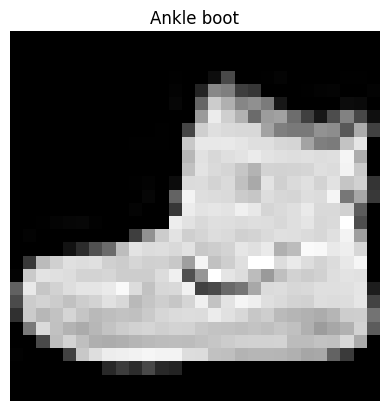

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("off")
plt.show()

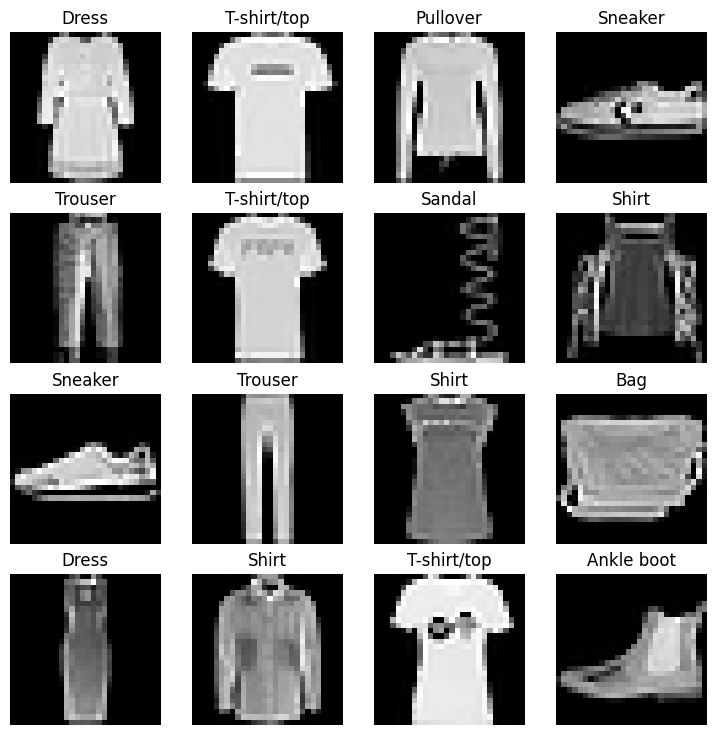

In [ ]:
# Plot more images
torch.manual_seed(333)
fig = plt.figure(figsize = (9, 9))
rows, cols = 4, 4

import random

for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size = (1,)).item() # reproducible, size for shape, .item() to convert to int
  # print(random_idx)
  # random_idx = random.randint(0, len(train_data)) # Not reproducible
  img, label = train_data[random_idx]

  fig.add_subplot(rows, cols, i)
  plt.title(class_names[label])
  plt.axis(False)
  plt.imshow(img.squeeze(), cmap = "gray")



## Prepare DataLoader

* Turns dataset (type: PyTorch Datasets) into python iterable
* Turn data into batches (or mini-batches)
  * More computationally efficient, store less things in memory at the same time. So we break it down to 32 (arbitrary) images at a time (batch size of 32)
  * It gives the nn more chances to update its gradients per epoch (after each batch)

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False) # No need to shuffle here

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7da488be12d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7da488b23dd0>)

In [ ]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7da488be12d0>, <torch.utils.data.dataloader.DataLoader object at 0x7da488b23dd0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
# Check out what is inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # iter() turns into iterable | features = images
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape: torch.Size([1, 28, 28])
Image size: torch.Size([1, 28, 28])
Label: 9, label size torch.Size([])


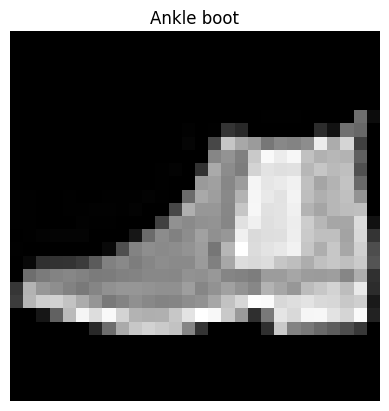

In [ ]:
# Show a sample
# torch.manual_seed(333)
random_idx = torch.randint(0, len(train_features_batch), size = (1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
print(f"Image shape: {image.shape}")

plt.title(class_names[label])
plt.axis(False)
plt.imshow(img.squeeze(), cmap = "gray")

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size {label.shape}")

##Building a model

###Baseline model > simple model, to compare to subsequent models

`nn.Flatten`

In [ ]:
# Create flatten function
flatten = nn.Flatten()

# Get a singe sample
x = train_features_batch[0]
x.shape

torch.Size([1, 28, 28])

In [ ]:
# Flatten the sample
output = flatten(x) # perfom forward pass

print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")


Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [ ]:
from torch import nn

class model_baseline(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_units),
        nn.Linear(in_features = hidden_units, out_features = output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

# Setup model with input parameters
model_0 = model_baseline(input_shape = flatten(train_features_batch).shape[1], #Takes a sample, flattens it and then takes the shape
                         hidden_units = 10,
                         output_shape = len(class_names))
model_0

model_baseline(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
type(flatten(train_features_batch).shape[1])

int

In [ ]:
dummy = torch.rand([1, 28, 28])
model_0(dummy)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### Loss, optimizer and evaluation metrics
* Loss function - `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Evaluation metric - `accuracy_fn()`

In [ ]:
# Download helper function from Learn PyTorch repo
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# impçort accuracy metric
from helper_functions import accuracy_fn

# Loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

### Function to time experiments
`print_trainTime()`

In [ ]:
from timeit import default_timer as timer
def print_trainTime(start: float,
                    end: float,
                    device: torch.device = None):
  """
  Prints difference between start and end time.
  """
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
# How it works
start_time = timer()
# Some code...
end_time = timer()
print_trainTime(start = start_time,
                end = end_time)

Train time on None: 0.000 seconds


5.698100000017803e-05

## Training loop and training a model on batches of data

`tqdm()`

In [ ]:
# import tqdm (python progress bar) to see amount of epochs
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(333)
torch.cuda.manual_seed(333)

train_timer_cpu = timer()

epochs = 3

# Creating training and test loop

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### Training
  train_loss = 0 # To go per batch
  # Adding a loop to loop through the training batches
  for batch, (images, labels) in enumerate(train_dataloader):
    model_0.train()

    preds = model_0(images)

    loss = loss_fn(preds, labels)
    train_loss += loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Batch: {batch} | Looked at: {batch * len(images)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)
  print(f"Epoch: {epoch} | Train loss: {train_loss:.5f}")


  ### Testing
  test_loss, test_acc = 0, 0

  model_0.eval()
  with torch.inference_mode():
    for images, labels in test_dataloader:
      test_preds = model_0(images)

      test_loss += loss_fn(test_preds, labels)

      test_acc += accuracy_fn(y_true = labels,
                              y_pred = test_preds.argmax(dim = 1)) #argmax turns logits into prediction labels

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")

train_timer_cpu_end = timer()


total_time_cpu = print_trainTime(start = train_timer_cpu,
                                  end = train_timer_cpu_end,
                                  device = str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Batch: 0 | Looked at: 0/60000 samples
Batch: 400 | Looked at: 12800/60000 samples
Batch: 800 | Looked at: 25600/60000 samples
Batch: 1200 | Looked at: 38400/60000 samples
Batch: 1600 | Looked at: 51200/60000 samples
Epoch: 0 | Train loss: 0.58562

Train loss: 0.5856 | Test loss: 0.4877, Test acc: 83.0970
Epoch: 1
-----
Batch: 0 | Looked at: 0/60000 samples
Batch: 400 | Looked at: 12800/60000 samples
Batch: 800 | Looked at: 25600/60000 samples
Batch: 1200 | Looked at: 38400/60000 samples
Batch: 1600 | Looked at: 51200/60000 samples
Epoch: 1 | Train loss: 0.47352

Train loss: 0.4735 | Test loss: 0.5285, Test acc: 81.6094
Epoch: 2
-----
Batch: 0 | Looked at: 0/60000 samples
Batch: 400 | Looked at: 12800/60000 samples
Batch: 800 | Looked at: 25600/60000 samples
Batch: 1200 | Looked at: 38400/60000 samples
Batch: 1600 | Looked at: 51200/60000 samples
Epoch: 2 | Train loss: 0.45623

Train loss: 0.4562 | Test loss: 0.4761, Test acc: 82.8574
Train time on cpu: 37.518 seconds


In [ ]:
len(train_dataloader),

(1875,)

In [ ]:
len(next(iter(train_dataloader))), next(iter(train_dataloader))[0].shape, next(iter(train_dataloader))[1].shape

(2, torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Make predictions and get model 0 results
`eval_model()`

In [ ]:
torch.manual_seed(333)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  """
  Returns a dictionary containing the results of model predicting on data_loader.
  """
  loss, acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for images, labels in tqdm(data_loader):
      images, labels = images.to(device), labels.to(device)
      preds = model(images)

      loss += loss_fn(preds, labels)
      acc += accuracy_fn(y_true = labels,
                         y_pred = preds.argmax(dim = 1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # Only works when model was created with a class
            "model_loss": loss.item(), # turns loss into a int
            "model_acc": acc
            }


In [ ]:
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn
                             )
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'model_baseline',
 'model_loss': 0.4760569632053375,
 'model_acc': 82.85742811501598}

## Model 1: Built with non-linearity

In [ ]:
class modelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_layers: int,
               output_shape: int):
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape, out_features = hidden_layers),
        nn.ReLU(),
        nn.Linear(in_features = hidden_layers, out_features = output_shape),
        nn.ReLU()
    )
  def forward(self, x):
    return self.layer_stack(x
        )



In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

model_1 = modelV1(input_shape = flatten(train_features_batch).shape[1],
                  hidden_layers = 10,
                  output_shape = len(class_names)
                  ).to(device)
next(model_1.parameters()).device

device(type='cpu')

### Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)



### Functionizing training and evaluation / testing loops

`train()`

`test()`

In [ ]:
def train(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          device: torch.device = device):
  """
  Tains a model based on data_loader.
  """
  train_loss, train_acc = 0, 0
  model.train()

  for batch, (images, labels) in enumerate(data_loader):
    images, labels = images.to(device), labels.to(device)

    preds = model(images)

    loss = loss_fn(preds, labels)
    train_loss += loss
    train_acc += accuracy_fn(y_true = labels,
                             y_pred = preds.argmax(dim = 1)) # Turns logits into prediction labels

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")

In [ ]:
def test(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          accuracy_fn,
          device: torch.device = device):
  ### Testing
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for images, labels in data_loader:
      images, labels = images.to(device), labels.to(device)

      preds = model(images)

      test_loss += loss_fn(preds, labels)
      test_acc += accuracy_fn(y_true = labels,
                              y_pred = preds.argmax(dim = 1)) #argmax turns logits into prediction labels

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

from timeit import default_timer as timer
train_time_start_gpu = timer()

epochs = 3

model_1.to(device)
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train(model = model_1,
        data_loader = train_dataloader,
        loss_fn = loss_fn,
        optimizer = optimizer,
        accuracy_fn = accuracy_fn,
        device = device
      )
  test(model = model_1,
        data_loader = test_dataloader,
        loss_fn= loss_fn,
        accuracy_fn = accuracy_fn,
        device = device)

train_time_end_gpu = timer()

total_time_gpu = print_trainTime(start = train_time_start_gpu,
                                  end = train_time_end_gpu,
                                  device = str(next(model_1.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.66566 | Train acc: 76.87667
Test loss: 0.52565 | Test acc: 80.55112
Epoch: 1
-------
Train loss: 0.49722 | Train acc: 82.23167
Test loss: 0.53623 | Test acc: 79.89217
Epoch: 2
-------
Train loss: 0.46846 | Train acc: 83.17667
Test loss: 0.47796 | Test acc: 82.85743
Train time on cpu: 39.063 seconds


In [ ]:
model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
model_1_results

{'model_name': 'modelV1',
 'model_loss': 0.4779611825942993,
 'model_acc': 82.85742811501598}

In [ ]:
model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

## Model 2: Convolutinal Neural Network (CNN)

### Functionizing training and evaluation / testing loops

`train()`

`test()`

In [ ]:
def train(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          optimizer: torch.optim.Optimizer,
          accuracy_fn,
          device: torch.device = device):
  """
  Trains a model based on data_loader.
  """
  train_loss, train_acc = 0, 0
  model.train()

  for batch, (images, labels) in enumerate(data_loader):
    images, labels = images.to(device), labels.to(device)

    preds = model(images)

    loss = loss_fn(preds, labels)
    train_loss += loss
    train_acc += accuracy_fn(y_true = labels,
                             y_pred = preds.argmax(dim = 1)) # Turns logits into prediction labels

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")


def test(model: torch.nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: torch.nn.Module,
          accuracy_fn,
          device: torch.device = device):
  ### Testing
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for images, labels in data_loader:
      images, labels = images.to(device), labels.to(device)

      preds = model(images)

      test_loss += loss_fn(preds, labels)
      test_acc += accuracy_fn(y_true = labels,
                              y_pred = preds.argmax(dim = 1)) #argmax turns logits into prediction labels

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.5f}")

### Stepping trough nn.Conv2d( )
* `conv_output`

In [ ]:
torch.manual_seed(333)

# Batch of images
images = torch.randn(size = (32, 3, 64, 64))
test_image = images[0]

print(f"> Image batch shape: {images.shape}")
print(f"> Single image shape: {test_image.shape}")
print(f"Test image \n {test_image}")

> Image batch shape: torch.Size([32, 3, 64, 64])
> Single image shape: torch.Size([3, 64, 64])
Test image 
 tensor([[[-0.3244, -1.5451, -0.9140,  ...,  0.1866, -0.6321,  0.7298],
         [ 1.3003,  1.8480,  0.1238,  ..., -0.7157,  0.6084, -0.9600],
         [-1.0048,  0.5456,  1.3652,  ..., -0.7742, -0.4446, -0.8876],
         ...,
         [ 1.4883,  0.9879,  0.5428,  ..., -0.3070, -0.0737, -0.6016],
         [ 0.1462,  0.4410, -0.3646,  ...,  0.8113, -0.0572,  0.1946],
         [-1.6155,  3.3513,  0.6321,  ...,  1.2111, -1.9540, -0.6241]],

        [[ 2.1971,  0.6537,  0.9458,  ..., -0.9256, -1.5818, -0.3395],
         [-0.6561, -1.6588,  1.8458,  ...,  1.1567,  2.4801, -0.0494],
         [-0.3590,  0.8931,  0.0713,  ..., -0.9280,  0.3180,  0.1291],
         ...,
         [ 0.9480,  0.6758,  0.9590,  ..., -0.4643, -0.8807,  1.4554],
         [ 0.1080, -1.2460,  0.0111,  ..., -0.6719, -1.0727,  1.7329],
         [ 1.6283,  0.5416, -2.9225,  ...,  0.2159,  0.4331,  0.6862]],

        

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
torch.manual_seed(333)

conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

conv_output = conv_layer(test_image)
print(conv_output.shape)
print(conv_output)

torch.Size([10, 62, 62])
tensor([[[-0.2344,  0.4431,  0.3753,  ...,  0.5368, -0.1103, -0.1218],
         [ 0.1231, -0.5943,  0.5940,  ..., -0.5910,  0.0255, -0.0046],
         [ 0.2663,  0.4569, -0.2879,  ...,  0.4762,  0.7506,  0.5107],
         ...,
         [ 0.5130,  0.1038,  0.3841,  ..., -0.8356,  0.1262, -0.6985],
         [-0.1612, -0.9287,  0.4530,  ..., -0.3794, -0.6894,  0.1435],
         [ 0.4514, -0.6870, -0.8917,  ...,  0.1074,  0.1204,  0.5868]],

        [[-0.0532,  0.2050, -1.1309,  ...,  0.0105,  0.0986,  0.2991],
         [ 1.3927, -0.4666,  0.5738,  ...,  1.0060, -0.8589, -0.9373],
         [-0.2126, -0.8664, -0.3850,  ..., -0.1388, -0.0465, -0.1594],
         ...,
         [-0.5928, -1.0609,  0.7145,  ..., -0.4630,  1.0661, -1.2288],
         [-0.3791, -0.2636,  0.7616,  ..., -0.5828, -0.8873, -0.4190],
         [ 0.7021, -0.7049, -0.3589,  ..., -0.0120, -0.7884, -0.2757]],

        [[-0.4175, -1.1837, -0.5473,  ..., -1.1243, -0.1045, -0.3654],
         [ 0.4851,  

### Stepping through maxpool2d( )

In [ ]:
max_pool_layer = nn.MaxPool2d(kernel_size = 2)

max_pool_output = max_pool_layer(conv_output)
print(max_pool_output.shape)
print(max_pool_output)

torch.Size([10, 31, 31])
tensor([[[ 0.4431,  0.5940,  0.3159,  ...,  0.6169,  0.5368,  0.0255],
         [ 0.4569,  0.6746,  0.2926,  ...,  0.4033,  0.4762,  0.7506],
         [ 0.9048,  0.3540,  0.4755,  ...,  0.5856,  0.5849,  0.5125],
         ...,
         [ 0.4910,  0.3307,  0.6608,  ...,  0.8468,  0.7973,  0.6090],
         [ 0.5130,  0.3841,  1.2565,  ...,  0.3408,  0.0607,  0.1262],
         [ 0.4514,  0.4530,  1.3071,  ...,  1.3493,  0.2753,  0.5868]],

        [[ 1.3927,  0.5738,  0.1939,  ...,  1.0047,  1.0060,  0.2991],
         [ 0.7510,  0.7527,  0.7868,  ...,  0.6945, -0.1388, -0.0465],
         [ 0.3787,  1.0697,  0.8830,  ...,  0.5961,  0.9403,  0.4085],
         ...,
         [ 0.2608,  0.5690,  0.5540,  ...,  0.3292,  0.4818,  0.5668],
         [ 0.0137,  0.7145,  0.6513,  ...,  0.2465, -0.4630,  1.0661],
         [ 0.7021,  0.7616,  0.5244,  ...,  0.1603, -0.0120, -0.2757]],

        [[ 0.4851,  0.2794,  0.3071,  ...,  0.5612,  1.0675,  0.4611],
         [ 0.3530,  

### Creating model and testing model

In [ ]:
class FashionCNN(nn.Module):
  """
  Write a model that replicates thje TinyVGG model
  from CNN explainer website
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, # Nº of color channels
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0),
        nn.ReLU(),
        nn.Conv2d(
            in_channels = hidden_units,
            out_channels = hidden_units,
            kernel_size = 3,
            stride = 1,
            padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 4 * 4, # Calculated from the output shape of the last pooling layer
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape) # Helps to know the shape for future layers
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(333)
model_CNN = FashionCNN(input_shape = 1,
                       hidden_units = 10,
                       output_shape = len(class_names)).to(device)

In [ ]:
image.shape # CNN - in_channels is the amount of color channels

torch.Size([1, 28, 28])

(<matplotlib.image.AxesImage at 0x7da4882d8e50>, torch.Size([1, 28, 28]))

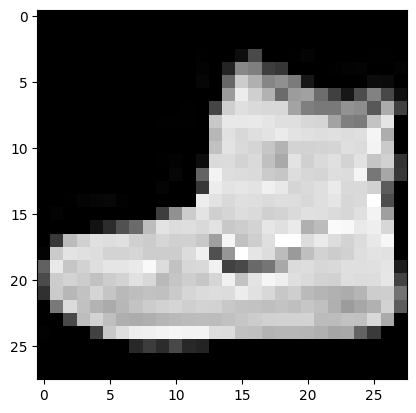

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray"), image.shape # CNN - in_channels is the amount of color channels

### Loss function and optimizer

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_CNN.parameters(),
                            lr = 0.1)


### Training and testing with functions

In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

from timeit import default_timer as timer
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train(
      model = model_CNN,
      data_loader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn,
      device = device
  )
  test(
      model = model_CNN,
      data_loader = test_dataloader,
      loss_fn = loss_fn,
      accuracy_fn = accuracy_fn,
      device = device
  )

train_time_end = timer()

train_time = print_trainTime(start = train_time_start,
                             end = train_time_end,
                             device = str(next(model_CNN.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.70268 | Train acc: 74.27167
Test loss: 0.47177 | Test acc: 83.14696
Epoch: 1
-------
Train loss: 0.43234 | Train acc: 84.29833
Test loss: 0.43582 | Test acc: 84.17532
Epoch: 2
-------


KeyboardInterrupt: 

In [ ]:
model_CNN_results = eval_model(
    model = model_CNN,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_CNN_results

In [ ]:
model_0_results

## Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame(data = [model_0_results, model_1_results, model_CNN_results])
compare_results

In [ ]:
# Add training time to results comparison

compare_results["training_time"] = [total_time_cpu, total_time_gpu, train_time]
compare_results

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind = 'barh')
plt.xlabel("Model Accuracy")
plt.ylabel("Model Name")

In [ ]:
import seaborn as sns

sns.barplot(data = compare_results,
            x = "model_name",
            y = "model_loss",
            hue = "model_acc")

In [ ]:
def make_predictions(
    model: torch.nn.Module,
    data: list,
    device: torch.device = device):
  model.to(device)
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Add a batch dimension to the sample REQUIRED because: nn.Conv2d, nn.Linear expects input in the format [batch_size, channels, height, width]
      sample = torch.unsqueeze(sample, dim = 0).to(device)

      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0)
      pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [ ]:
test_data

In [ ]:
img, label = test_data[0][:10]
img.shape, label

In [ ]:
# Getting samples

import random
# random.seed(333)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k = 9): # k is the max
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap = "gray")
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions with the trained model
pred_probs = make_predictions(
    model = model_CNN,
    data = test_samples,
    device = device
)

pred_probs

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim = 1)
pred_classes, test_labels

In [ ]:
# Plot predictions
plt.figure(figsize = (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)
  plt.imshow(sample.squeeze(), cmap = "gray") # Squeeze to remove batch dimendion

  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = "g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize = 10, c = "r") # red text if prediction not same as truth

  plt.axis(False)

## Makig a confusion matrix | prediction evaluation

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_CNN.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = "Making predictons"):
    X, y = X.to(device), y.to(device)

    y_pred = model_CNN(X)
    y_pred = torch.softmax(y_pred, dim = 0).argmax(dim = 1)

    y_preds.append(y_pred.cpu()) # Put on CPU for mathplotlib

# print(y_preds)
y_preds_tensor = torch.cat(y_preds)
y_preds_tensor, len(y_preds_tensor)


In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"torchmetrics: {torchmetrics.__version__}")
  print(f"mlxtend: {mlxtend.__version__}")
except:
  # !pip install -q torchmetrics -U mlxtend
  # print(f"torchmetrics: {torchmetrics.__version__}")
  # print(f"mlxtend: {mlxtend.__version__}")
  print("Error")

In [ ]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"

In [ ]:
test_data.targets, test_labels

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# Setup confusion matrix
confmat = ConfusionMatrix(task = "multiclass", num_classes = len(class_names))
confmat_tensor = confmat(preds = y_preds_tensor, target = test_data.targets)
confmat_tensor

In [ ]:
# Plot confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # numpy for mathplotlib
    figsize = (9, 9),
    class_names = class_names,
    show_normed = True
)

## Saving and loading model

In [ ]:
from pathlib import Path

# directory
model_path = Path("models")
model_path.mkdir(parents = True, exist_ok = True)

# save path
model_name = "computerVision_CNN_model.pth"
save_path = model_path / model_name

# save the model state dict
print(f"Saving model to: {save_path}")
torch.save(obj = model_CNN.state_dict(),
           f = save_path)

In [ ]:
# Save
torch.manual_seed(333)
torch.cuda.manual_seed(333)

model_CNN2 = FashionCNN(input_shape = 1,
                        hidden_units = 10,
                        output_shape = len(class_names)
                        )

model_CNN2.load_state_dict(torch.load(f = save_path))

model_CNN2.to(device)

In [ ]:
model_CNN_results

In [ ]:
# Test

torch.manual_seed(333)
torch.cuda.manual_seed(333)

model_CNN2_results = eval_model(
    model = model_CNN2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)
model_CNN2_results

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_CNN_results["model_loss"]),
              torch.tensor(model_CNN2_results["model_loss"]),
              atol = 1e-01)

# Custom datasets

## Seting directory, downloading data

In [ ]:
import torch
from torch import nn

# device = "cuda" if torch.cuda.is_available else "cpu"
device = "cpu"

In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print(f"{image_path} directory already exists... skipping download")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents = True, exist_ok = True)

# Download data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak, sushi data...")
  f.write(request.content)

# Unzip
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  print("Unzipping pizza, steak, sushi data...")
  zip_ref.extractall(image_path)

data/pizza_steak_sushi directory already exists... skipping download
Unzipping pizza, steak, sushi data...


## Data preparation / exploration

In [ ]:
import os
def walk_trough_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

In [ ]:
image_path


PosixPath('data/pizza_steak_sushi')

walk_trough_dir(image_path)

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

data/pizza_steak_sushi/test/steak/1868005.jpg
steak
Image size: (512, 512)
Image mode: RGB
Image format: JPEG


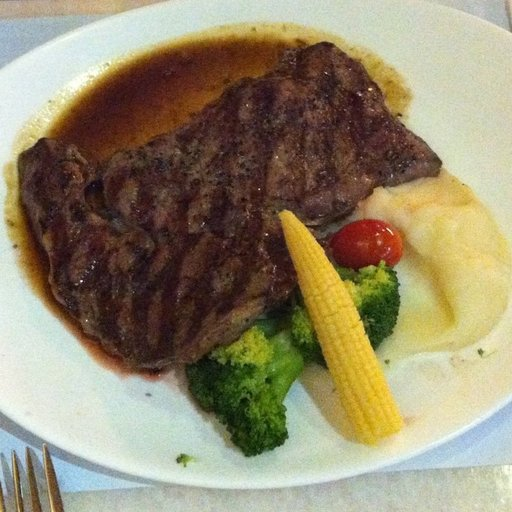

In [ ]:
# Visualizing an image
import random
from PIL import Image

# random.seed(333)

# All image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# Open image
img = Image.open(random_image_path)

# Print metadata
print(f"Image size: {img.size}")
print(f"Image mode: {img.mode}")
print(f"Image format: {img.format}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

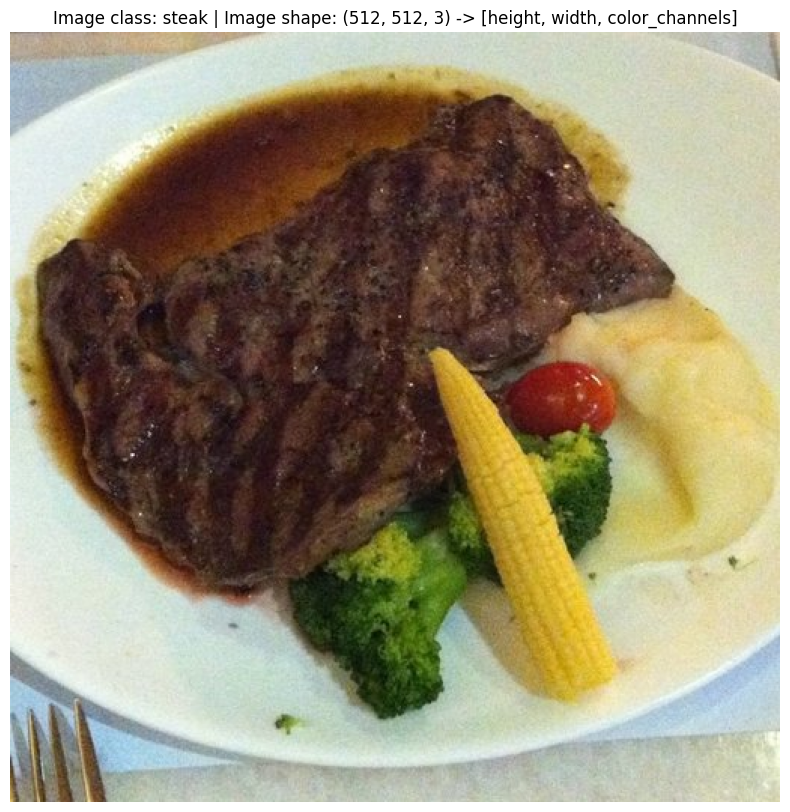

In [ ]:
# Replicate with matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## Transforming data into tensors
*Flipping horozontally and resizing>: `data_transform`
* Visualizing normal and transformed data: `plot_transformed_images( )`

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.7020, 0.7020, 0.7020,  ..., 0.7137, 0.7059, 0.7059],
         [0.6588, 0.6980, 0.6980,  ..., 0.7059, 0.7059, 0.7098],
         [0.6353, 0.7020, 0.7412,  ..., 0.6706, 0.6784, 0.6745],
         ...,
         [0.8784, 0.8431, 0.7922,  ..., 0.4667, 0.5020, 0.5373],
         [0.8588, 0.8392, 0.8000,  ..., 0.4667, 0.5333, 0.5098],
         [0.8392, 0.8431, 0.8353,  ..., 0.4863, 0.5529, 0.5333]],

        [[0.6549, 0.7020, 0.7176,  ..., 0.6431, 0.6471, 0.6471],
         [0.6314, 0.7098, 0.7255,  ..., 0.6431, 0.6549, 0.6588],
         [0.6392, 0.7176, 0.7490,  ..., 0.6863, 0.6902, 0.6863],
         ...,
         [0.8980, 0.8627, 0.8196,  ..., 0.4471, 0.4863, 0.5294],
         [0.8706, 0.8549, 0.8235,  ..., 0.4078, 0.4980, 0.4627],
         [0.8392, 0.8510, 0.8471,  ..., 0.4157, 0.5176, 0.4745]],

        [[0.5922, 0.6706, 0.6902,  ..., 0.5843, 0.5922, 0.5804],
         [0.5843, 0.6902, 0.7020,  ..., 0.5686, 0.5882, 0.5922],
         [0.6000, 0.6980, 0.7216,  ..., 0.6706, 0.6784, 0.

In [ ]:
def plot_transformed_images(image_paths, transform, n = 3, seed = None):
    """
    Selects random images from a path of images and loads/transfomrs
    them then plots the original vs the transformed version
    """
    if seed:
        random.seed(seed)
    random_image_paths = random.sample(image_paths, k = n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            # Transform image
            transformed_image = transform(f).permute(1, 2, 0) # Will need to change back to color channels last again
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize = 16)

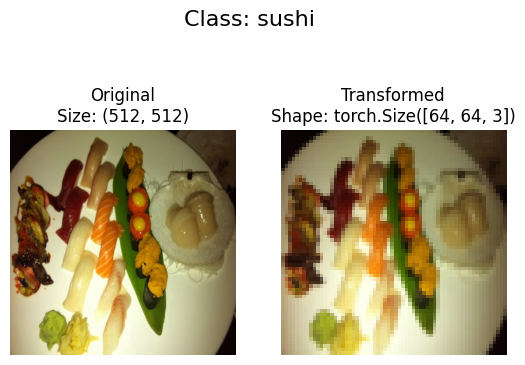

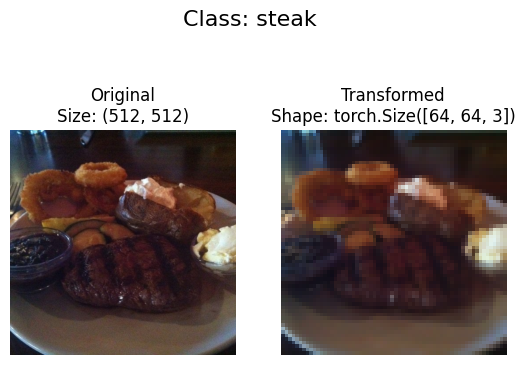

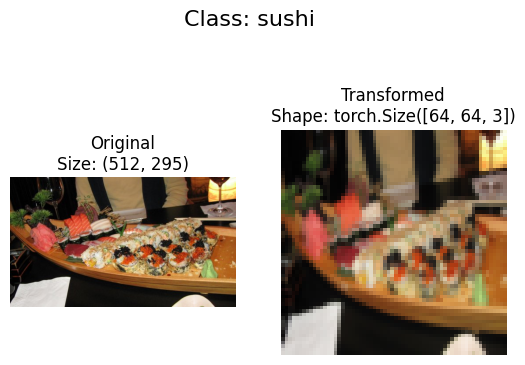

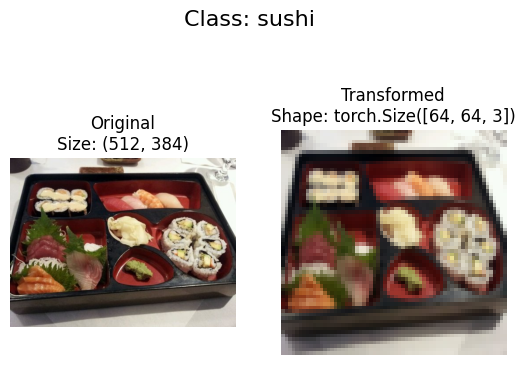

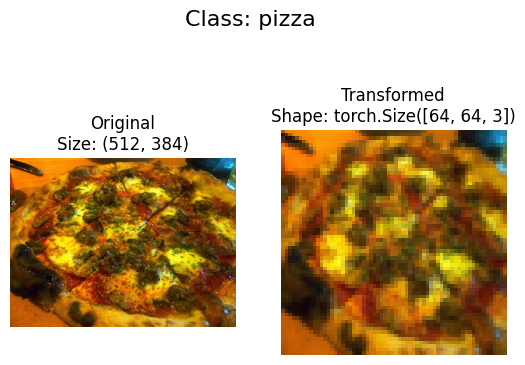

In [ ]:
plot_transformed_images(image_path_list,
                        data_transform,
                        5
                        )

## Option 1: Loading image data using `ImageFolder`

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = data_transform, # Transform for images
                                  target_transform = None) # Transform for labels / targets

test_data = datasets.ImageFolder(root = test_dir,
                                  transform = data_transform, # Transform for images
                                  target_transform = None) # Transform for labels / targets

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Length of dataset
len(train_data), len(test_data)

(225, 75)

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"> Image: \n{img} \n> of shape {img.shape} \n> of type {img.dtype} \n> Label: {label} ({class_names[label]}) of type {type(label)}")

> Image: 
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 

In [ ]:
# Rearrenge to channels last for matplotlib
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
img_permute = img.permute(1, 2, 0)
print(f"New shape: {img_permute.shape} -> [height, width, color_channels]")


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
New shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

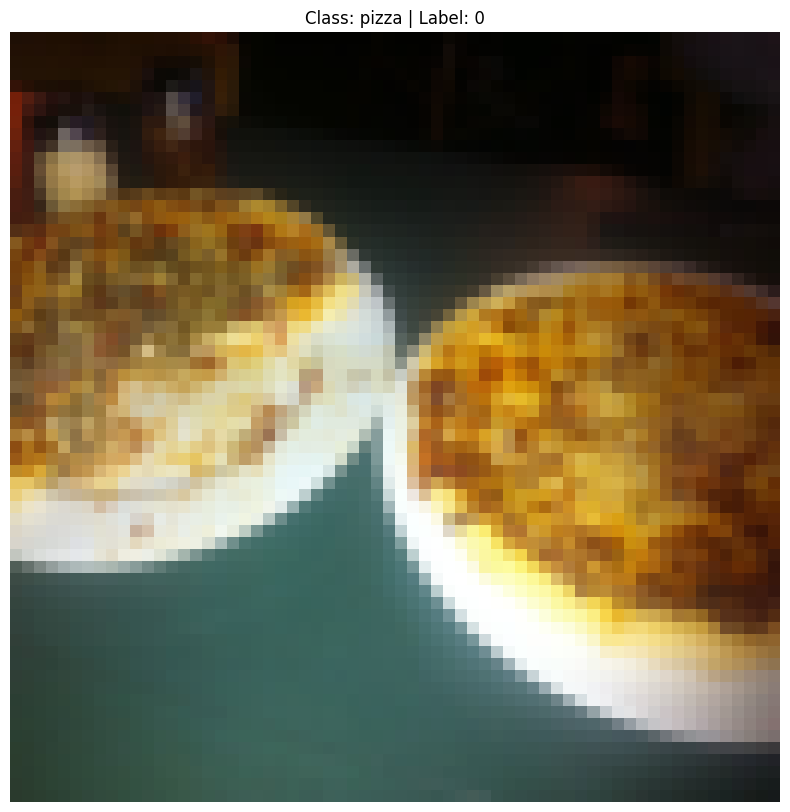

In [ ]:
# Plot image
plt.figure(figsize = (10, 10))
plt.imshow(img_permute)
plt.title(f"Class: {class_names[label]} | Label: {label}")
plt.axis(False)

## Option 2: Loading image data with a custom `Dataset`

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
# Trying to replicate:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(target_directory)

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])
class_names_found

data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """
  Finds the class folder names in a target directory,
  outputs a tuple with a list and a dictionary of values
  """
  classes = sorted([entry.name for entry in list(os.scandir(directory)) if entry.is_dir()])
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory} | Check file structure")

  classes_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
  return classes, classes_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

Replicate `ImageFolder` with a custom `Dataset`


In [ ]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1 Subclass
class ImageFolderCustom(Dataset):
  # 2 Initialize
  def __init__(self,
               target_dir: str,
               transform = None):
    # 3 Create class attributes
    # Get all of the images paths
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    # Setup transforms
    self.transform = transform
    # Setup class names
    self.classes, self.class_to_idx = find_classes(target_dir)

  #4 Create a function to load images
  def load_image(self, index: int) -> Image.Image:
    """
    Opens and loads an image via a path
    """
    image_path = self.paths[index]
    return Image.open(image_path)
  # 5 Overwrite __len__()
  def __len__(self) -> int:
    """
    Returns the total number of samples
    """
    return len(self.paths)

    # 6 Overwrite __getitem()
    # Replicates img, label = train_data[0]
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    """
    Returns a sample containing image and label
    """
    img = self.load_image(index)
    class_name = self.paths[index].parent.name # expects path in format: data_folder/class_name/image.jpg
    class_idx = self.class_to_idx[class_name]

    # Transfrom if necessary
    if self.transform:
      return self.transform(img), class_idx # Return: data, label | as a tuple as indicated in def
    else:
      return img, class_idx

In [ ]:
# Create Transform
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p = 0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Test out ImageFoldercustom
train_data_custom = ImageFolderCustom(target_dir = train_dir,
                                      transform = train_transforms)

test_data_custom = ImageFolderCustom(target_dir = test_dir,
                                      transform = test_transforms)

In [ ]:
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7cd910d9ec90>,
 <__main__.ImageFolderCustom at 0x7cd912713a10>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check for equality between original ImageFolder Dataset and ImageFolderCustom Dataset
print(f"Are the train datasets equal? {train_data.classes == train_data_custom.classes}")
print(f"Are the test datasets equal? {test_data.classes == test_data_custom.classes}")

Are the train datasets equal? True
Are the test datasets equal? True


## Turn loaded images (from dataset) into `DataLoader`
* A `DataLoader` is going to turn the `Dataset` into iterables and we can customise the batch_size so our model can see `batch_size` images at a time.

In [ ]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = batch_size,
                              num_workers = os.cpu_count(), # Number of cores used to load data
                              shuffle = True
                              )

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = batch_size,
                              num_workers = os.cpu_count(), # Number of cores used to load data
                              shuffle = True
                              )

In [ ]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cd910d7fd90>,
 <torch.utils.data.dataloader.DataLoader at 0x7cd910dbed50>)

In [ ]:
len(train_dataloader), len(test_dataloader)

(8, 3)

In [ ]:
next(iter(train_dataloader))

[tensor([[[[0.2745, 0.1412, 0.0784,  ..., 0.2118, 0.1922, 0.1922],
           [0.0784, 0.1098, 0.1882,  ..., 0.1882, 0.1765, 0.1765],
           [0.2471, 0.3020, 0.3490,  ..., 0.4275, 0.4000, 0.5216],
           ...,
           [0.4902, 0.4941, 0.4980,  ..., 0.4118, 0.3373, 0.3373],
           [0.4902, 0.4980, 0.5020,  ..., 0.4706, 0.4471, 0.4627],
           [0.4980, 0.4980, 0.5020,  ..., 0.4745, 0.4824, 0.4784]],
 
          [[0.0235, 0.0078, 0.0039,  ..., 0.0078, 0.0078, 0.0078],
           [0.0039, 0.0078, 0.0196,  ..., 0.0314, 0.0275, 0.0471],
           [0.0353, 0.0471, 0.0706,  ..., 0.1137, 0.1137, 0.3255],
           ...,
           [0.3686, 0.3686, 0.3725,  ..., 0.2863, 0.2235, 0.2196],
           [0.3608, 0.3647, 0.3647,  ..., 0.3451, 0.3255, 0.3373],
           [0.3490, 0.3608, 0.3647,  ..., 0.3529, 0.3529, 0.3569]],
 
          [[0.1176, 0.1137, 0.1137,  ..., 0.1137, 0.1098, 0.1137],
           [0.1020, 0.1059, 0.1098,  ..., 0.1020, 0.1098, 0.1255],
           [0.1098, 0.10

In [ ]:
img, label = next(iter(train_dataloader))
print(f"> Image shape: {img.shape} -> [Batch_size, color_channels, height, width]")
print(f"> Label shape: {label.shape}")

> Image shape: torch.Size([32, 3, 64, 64]) -> [Batch_size, color_channels, height, width]
> Label shape: torch.Size([32])


## Function to display random images
`display_random_images()`

In [ ]:
# Functin to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str],
                          n: int = 10,
                          diplay_shape: bool = True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False
    print("n should not be larger than 10, setting display_shape to False")

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k = n)

  plt.figure(figsize = (16, 10)) # So that inside the loop plots are added to this figure

  for i, target_sample in enumerate(random_samples_idx):
    img, label = dataset[target_sample][0], dataset[target_sample][1]

    img_adjust = img.permute(1, 2, 0)

    plt.subplot(1, n, i + 1) # Para todos em 1 linha
    # plt.subplots(nrows = 1, ncols = 1, figsize = (16, 10)) # Por coluna
    plt.imshow(img_adjust)
    plt.axis(False)
    if classes:
      title = f"Class: {classes[label]} | Label: {label}"
      if diplay_shape:
        title = f"Class: {classes[label]} | Label: {label} | \nShape: {img_adjust.shape}"

    plt.title(title)




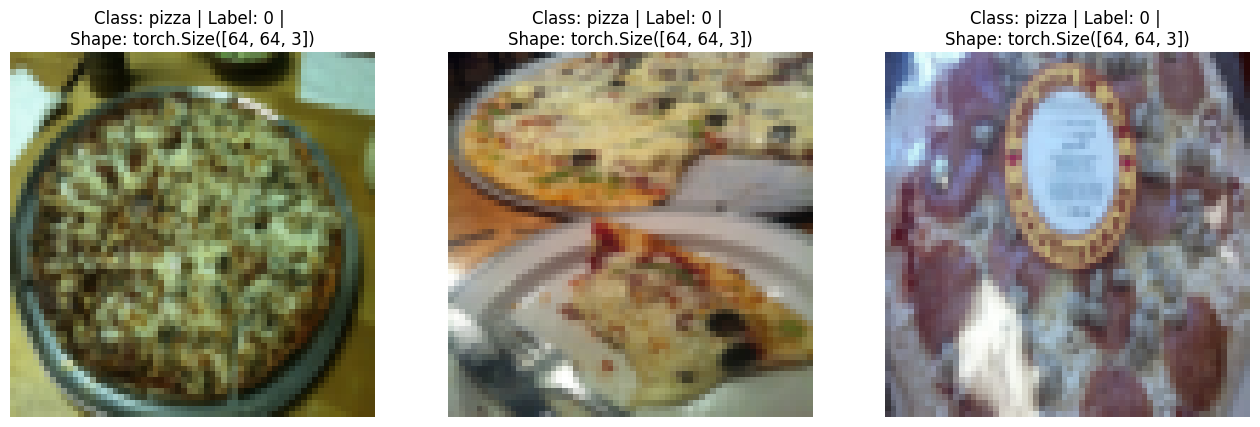

In [ ]:
# Display images from ImageFolder created Dataset
display_random_images(train_data, class_names, n = 3)

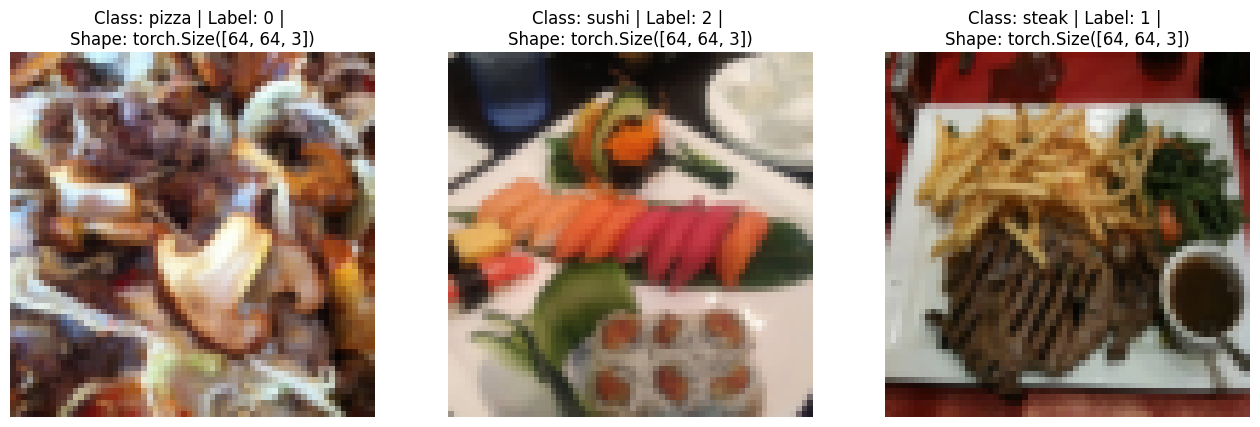

In [ ]:
# Display images from ImageFolderCustom created Dataset
display_random_images(train_data_custom, class_names, n = 3)

## Turn custom loaded images into `DataLoader` s

In [ ]:
from torch.utils.data import DataLoader
batch_size = 32
num_cpus = os.cpu_count()
print(f"Number of CPUs available: {num_cpus}")
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                              batch_size = batch_size,
                              num_workers = num_cpus, # Number of cores used to load data
                              shuffle = True
                              )

test_dataloader_custom = DataLoader(dataset = test_data_custom,
                              batch_size = batch_size,
                              num_workers = num_cpus
                              )
train_data_custom, test_data_custom

Number of CPUs available: 2


(<__main__.ImageFolderCustom at 0x7cd910d9ec90>,
 <__main__.ImageFolderCustom at 0x7cd912713a10>)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
print(f"> Image shape: {img_custom.shape} -> [Batch_size, color_channels, height, width]")
print(f"> Label shape: {label_custom.shape}")

> Image shape: torch.Size([32, 3, 64, 64]) -> [Batch_size, color_channels, height, width]
> Label shape: torch.Size([32])


## Other forms of transforms (Data Augmentation)

In [ ]:
# Trivial augment
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

In [ ]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg')]

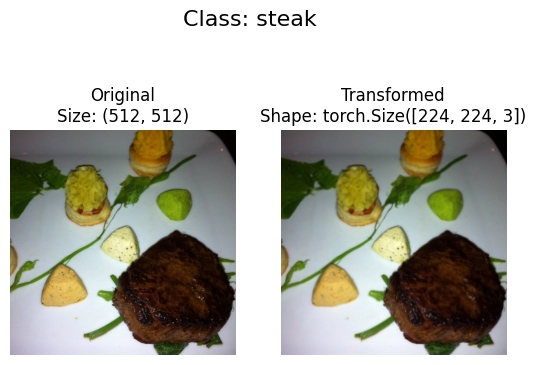

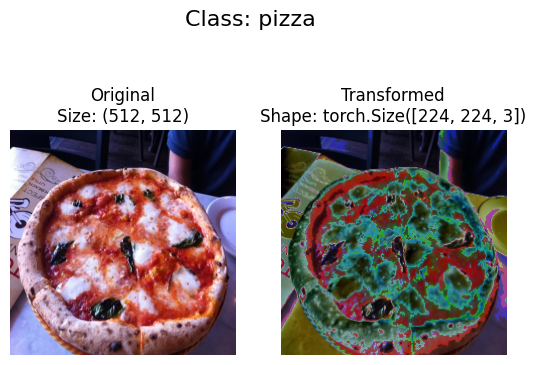

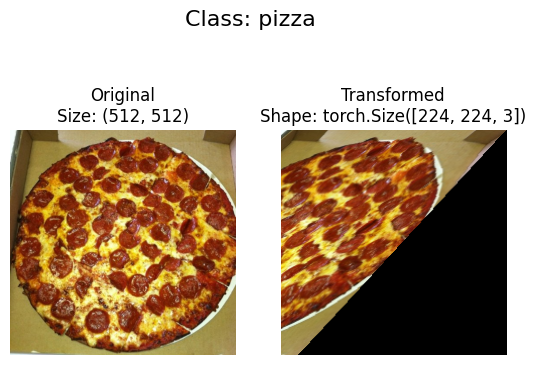

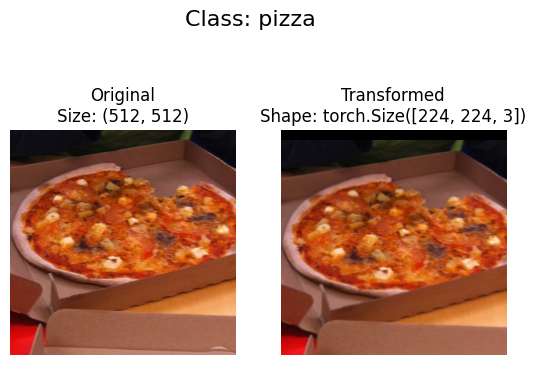

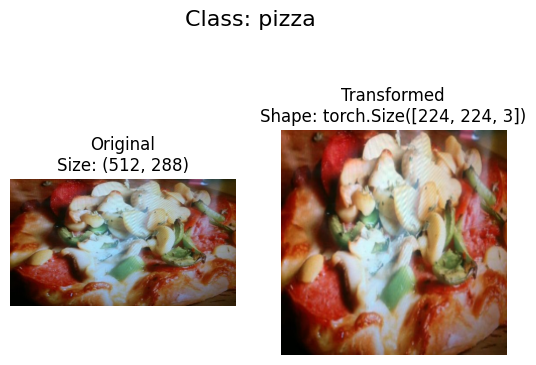

In [ ]:
plot_transformed_images(
  image_path_list,
  transform = train_transform,
  n = 5,
  seed = 42
 )

## Baseline model without data augmentation

### Transforms and loading data for model

In [ ]:
# Simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [ ]:
# Load and transform data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root = train_dir,
                                         transform = simple_transform)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                         transform = simple_transform)

# Turn dataset into DataLoaders
import os
from torch.utils.data import DataLoader

batch_size = 32
num_workers = os.cpu_count()

train_data_loader = DataLoader(dataset = train_data_simple,
                              batch_size = batch_size,
                              num_workers = num_workers,
                              shuffle = True)

test_data_loader = DataLoader(dataset = test_data_simple,
                              batch_size = batch_size,
                              num_workers = num_workers,
                              shuffle = True)

train_data_loader, len(train_data_loader), test_data_loader, len(test_data_loader)

(<torch.utils.data.dataloader.DataLoader at 0x7cd9107d8c10>,
 8,
 3)

### Model

In [ ]:
class TinyVGG(nn.Module):
  """
  Reproduces the TinyVGG architecture.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2) # By default the same as kernel_size
    )

    self.conv_block2 = nn.Sequential(
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 0),
      nn.ReLU(),
      nn.Conv2d(in_channels = hidden_units,
                out_channels = hidden_units,
                kernel_size = 3,
                stride = 1,
                padding = 0),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size = 2,
                    stride = 2) # By default the same as kernel_size
      )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units * 13 * 13,
                  out_features = output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.conv_block1(x)
    # print(f"Block 1 shape: {x.shape}")
    x = self.conv_block2(x)
    # print(f"Block 2 shape: {x.shape}")
    x = self.classifier(x)
    return x
    # return self.classifier(self.conv_block2(self.conv_block1(x)) # Benefits from operator fusion, use after debugging

In [ ]:
torch.manual_seed(333)
# torch.cuda.manual_seed(333)

model_baseline = TinyVGG(input_shape = 3, #Num of channels
                         hidden_units = 10,
                         output_shape = len(train_data_simple.classes) # Num of classes
                         ).to(device) # !!! Sending to GPU
model_baseline

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### Creating dummy data to test and view what to set in_features shape to


In [ ]:
dummy_data = torch.randn((32, 3, 64, 64)).to(device)
dummy_data.shape

torch.Size([32, 3, 64, 64])

In [ ]:
model_baseline(dummy_data)

tensor([[ 0.1008,  0.0019,  0.0603],
        [ 0.0783,  0.0082,  0.0704],
        [ 0.0642, -0.0117,  0.0682],
        [ 0.0663,  0.0073,  0.0641],
        [ 0.0801,  0.0338,  0.0369],
        [ 0.0744, -0.0157,  0.0515],
        [ 0.0590, -0.0086,  0.0561],
        [ 0.0701,  0.0091,  0.0347],
        [ 0.0701,  0.0095,  0.0653],
        [ 0.0727, -0.0238,  0.0694],
        [ 0.0780,  0.0157,  0.0604],
        [ 0.0732,  0.0205,  0.0407],
        [ 0.0663,  0.0113,  0.0585],
        [ 0.0790, -0.0063,  0.0529],
        [ 0.0721,  0.0227,  0.0561],
        [ 0.0826,  0.0136,  0.0478],
        [ 0.0942, -0.0014,  0.0364],
        [ 0.0729, -0.0063,  0.0590],
        [ 0.0731,  0.0256,  0.0519],
        [ 0.1007, -0.0051,  0.0943],
        [ 0.1036, -0.0024,  0.0540],
        [ 0.0869, -0.0056,  0.0660],
        [ 0.1036,  0.0015,  0.0326],
        [ 0.0638,  0.0091,  0.0437],
        [ 0.0851,  0.0102,  0.0405],
        [ 0.0882,  0.0027,  0.0385],
        [ 0.0924,  0.0099,  0.0584],
 

## Try forward pass on a singel image (to test the model)

In [ ]:
img_batch, label_batch = next(iter(train_data_loader))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model_baseline(img_batch.to(device))

tensor([[ 0.0612, -0.0041,  0.0152],
        [ 0.0549,  0.0066,  0.0185],
        [ 0.0467, -0.0178,  0.0118],
        [ 0.0480, -0.0081,  0.0061],
        [ 0.0424,  0.0026,  0.0107],
        [ 0.0390,  0.0043,  0.0177],
        [ 0.0649, -0.0143,  0.0118],
        [ 0.0481,  0.0090,  0.0184],
        [ 0.0588,  0.0032,  0.0216],
        [ 0.0744,  0.0010,  0.0168],
        [ 0.0530,  0.0124,  0.0138],
        [ 0.0484,  0.0024,  0.0147],
        [ 0.0539,  0.0126,  0.0147],
        [ 0.0559, -0.0068,  0.0272],
        [ 0.0627, -0.0182,  0.0214],
        [ 0.0535,  0.0098,  0.0130],
        [ 0.0693, -0.0164,  0.0280],
        [ 0.0590,  0.0070,  0.0203],
        [ 0.0588,  0.0062,  0.0176],
        [ 0.0587,  0.0022,  0.0226],
        [ 0.0543,  0.0088,  0.0184],
        [ 0.0472,  0.0051,  0.0151],
        [ 0.0502,  0.0026,  0.0160],
        [ 0.0593,  0.0127,  0.0125],
        [ 0.0543,  0.0030,  0.0128],
        [ 0.0544,  0.0073,  0.0142],
        [ 0.0517,  0.0058,  0.0224],
 

### Use of `torchinfo` to get shapes through the model

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_baseline, imput_size = [1, 3, 64, 64])

Layer (type:depth-idx)                   Param #
TinyVGG                                  --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       280
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       910
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       910
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       910
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      5,073
Total params: 8,083
Trainable params: 8,083
Non-trainable params: 0

## Create train and test loops functions and then the combination of both
`train_step()`
`test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device = device):
  model.train()

  train_loss, train_acc = 0, 0

  for batch, (imgs, labels) in enumerate(dataloader):
    imgs, labels = imgs.to(device), labels.to(device)

    preds = model(imgs)

    loss = loss_fn(preds, labels)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    pred_probs = torch.argmax(torch.softmax(preds, dim = 1), dim = 1)
    train_acc += (pred_probs == labels).sum().item() / len(labels) # .item() to get int

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device = device):
  model.eval()

  test_loss, test_acc = 0, 0

  with torch.inference_mode():
    for batch, (imgs, labels) in enumerate(dataloader):
      imgs, labels = imgs.to(device), labels.to(device)

      preds = model(imgs)

      loss = loss_fn(preds, labels)
      test_loss += loss.item()

      result_labels = preds.argmax(dim = 1)
      test_acc += (result_labels == labels).sum().item() / len(labels)

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

### Creating a `train()` function to unite `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 10,
          device = device):

  # Empty results dictionary
  results = {
      "train_loss": [],
      "train_acc": [],
      "test_loss": [],
      "test_acc": []
  }

  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_data_loader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer,
                                       device = device)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    device = device)

    print(f"Epoch: {epoch + 1} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  return results

## Train and evaluate model

In [ ]:
# torch.manual_seed(333)
# torch.cuda.manual_seed(333)

epochs = 10

model_baseline = TinyVGG(input_shape = 3,
                         hidden_units = 10,
                         output_shape = len(train_data_simple.classes)
                         ).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_baseline.parameters(),
                             lr = 0.001)

from timeit import default_timer as timer

start_time = timer()

model_baseline_results = train(model = model_baseline,
                               train_dataloader = train_data_loader,
                               test_dataloader = test_data_loader,
                               optimizer = optimizer,
                               loss_fn = loss_fn,
                               epochs = epochs)

end_time = timer()

print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 1.1040 | Train acc: 0.2656 | Test loss: 1.1016 | Test acc: 0.2898
Epoch: 2 | Train loss: 1.0980 | Train acc: 0.3047 | Test loss: 1.1112 | Test acc: 0.2481
Epoch: 3 | Train loss: 1.1053 | Train acc: 0.4453 | Test loss: 1.1070 | Test acc: 0.4432
Epoch: 4 | Train loss: 1.0710 | Train acc: 0.6094 | Test loss: 1.0932 | Test acc: 0.3078
Epoch: 5 | Train loss: 1.0770 | Train acc: 0.2969 | Test loss: 1.1001 | Test acc: 0.2898
Epoch: 6 | Train loss: 1.0522 | Train acc: 0.5859 | Test loss: 1.0711 | Test acc: 0.4621
Epoch: 7 | Train loss: 1.0479 | Train acc: 0.4062 | Test loss: 1.0944 | Test acc: 0.3201
Epoch: 8 | Train loss: 1.0030 | Train acc: 0.5742 | Test loss: 1.0426 | Test acc: 0.3816
Epoch: 9 | Train loss: 0.9942 | Train acc: 0.4727 | Test loss: 1.0487 | Test acc: 0.3911
Epoch: 10 | Train loss: 0.9536 | Train acc: 0.5469 | Test loss: 0.9959 | Test acc: 0.4233
Total training time: 18.903 seconds


## Loss curve

In [ ]:
# Get the model_baseline_results keys
model_baseline_results, model_baseline_results.keys()

({'train_loss': [1.1038722544908524,
   1.0858671367168427,
   1.078114703297615,
   1.041428193449974,
   0.9925287738442421,
   0.9795421808958054,
   0.9050837755203247,
   0.8560083582997322,
   0.8570568263530731,
   0.8134742006659508,
   0.7650818154215813,
   0.8529134690761566,
   0.7805896699428558,
   0.7526628822088242,
   0.980856403708458,
   0.969624787569046,
   0.9482257142663002,
   0.787687249481678,
   0.7646905556321144,
   0.8284181207418442],
  'train_acc': [0.2890625,
   0.51171875,
   0.30859375,
   0.421875,
   0.6015625,
   0.48046875,
   0.52734375,
   0.5703125,
   0.515625,
   0.671875,
   0.6484375,
   0.5703125,
   0.73046875,
   0.70703125,
   0.546875,
   0.5390625,
   0.5546875,
   0.71484375,
   0.67578125,
   0.578125],
  'test_loss': [1.0990047057469685,
   1.0685135126113892,
   1.0570319890975952,
   1.0662427345911663,
   1.0274752179781597,
   1.0100093881289165,
   0.9593569238980612,
   0.9790719548861185,
   0.978508452574412,
   1.018008669

In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  """
  Plots training curves of a results dictionary.
  """
  train_loss = results["train_loss"]
  test_loss = results["test_loss"]

  train_accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize = (15, 7))

  # Plot the loss
  plt.subplot(1, 2, 1)
  plt.plot(epochs, train_loss, label = "train_loss")
  plt.plot(epochs, test_loss, label = "test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot the accuracy
  plt.subplot(1, 2, 2)
  plt.plot(epochs, train_accuracy, label = "train_accuracy")
  plt.plot(epochs, test_accuracy, label = "test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

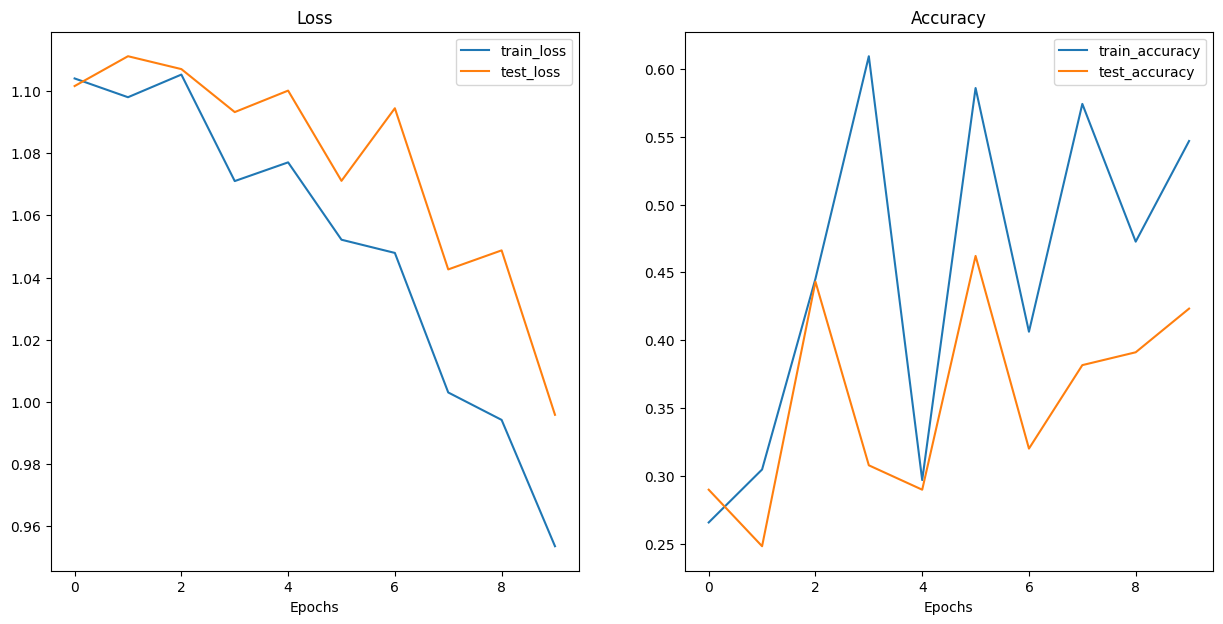

In [ ]:
plot_loss_curves(model_baseline_results)

## New model

### Transform with data augmentation

In [ ]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins = 31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

### Test and train `Dataset` into `DataLoader` with data augmentation

In [ ]:
from torchvision import datasets
train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trivial)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                           transform = test_transform_simple)

In [ ]:
# Turn Datasets into DataLoaders
import os
batch_size = 32
num_workers = os.cpu_count()

train_dataloader_augmented = DataLoader(dataset = train_data_augmented,
                                          batch_size = batch_size,
                                          num_workers = num_workers,
                                          shuffle = True)

test_dataloader_simple = DataLoader(dataset = test_data_simple,
                                    batch_size = batch_size,
                                    num_workers = num_workers,
                                    shuffle = False)

### Construct and train model 1
Same architecture as model_baseline but with augmented data

In [ ]:
torch.manual_seed(333)
model_1 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data_augmented.classes)
                  ).to(device)

model_1

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [ ]:
torch.manual_seed(333)
torch.cuda.manual_seed(333)

epochs = 10

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(),
                             lr = 0.001)

from timeit import default_timer as timer

start_time = timer()

model_1_results = train(model = model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader = test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = epochs,
                        device = device)

end_time = timer()

print(f"Training time: {end_time - start_time:.3f}")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | Train loss: 0.4298 | Train acc: 0.8359 | Test loss: 1.3154 | Test acc: 0.4025
Epoch: 2 | Train loss: 0.3964 | Train acc: 0.8672 | Test loss: 1.3042 | Test acc: 0.4034
Epoch: 3 | Train loss: 0.3839 | Train acc: 0.8555 | Test loss: 1.4025 | Test acc: 0.3835
Epoch: 4 | Train loss: 0.3273 | Train acc: 0.9062 | Test loss: 1.3331 | Test acc: 0.4943
Epoch: 5 | Train loss: 0.3331 | Train acc: 0.8828 | Test loss: 2.0918 | Test acc: 0.4044
Epoch: 6 | Train loss: 0.4335 | Train acc: 0.8711 | Test loss: 1.4025 | Test acc: 0.4839
Epoch: 7 | Train loss: 0.2920 | Train acc: 0.8984 | Test loss: 1.5648 | Test acc: 0.4148
Epoch: 8 | Train loss: 0.2905 | Train acc: 0.9141 | Test loss: 1.4148 | Test acc: 0.4754
Epoch: 9 | Train loss: 0.2615 | Train acc: 0.9180 | Test loss: 1.5401 | Test acc: 0.3835
Epoch: 10 | Train loss: 0.4056 | Train acc: 0.8164 | Test loss: 1.6352 | Test acc: 0.4347
Training time: 22.063


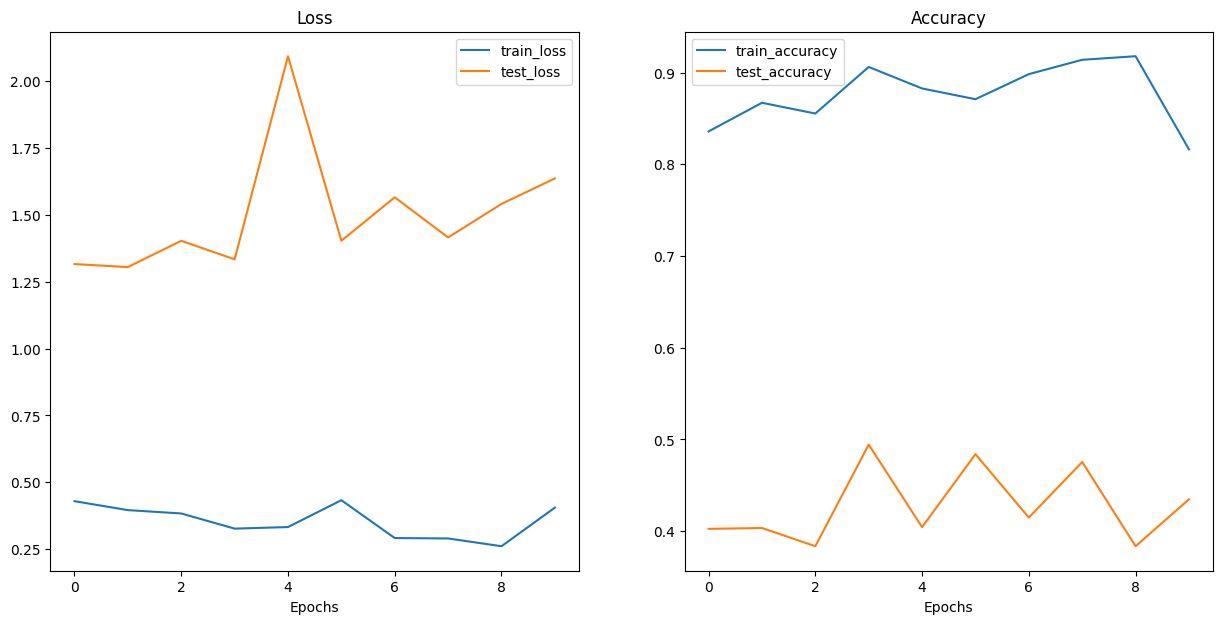

In [ ]:
plot_loss_curves(model_1_results)

### Compare model results

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_baseline_results)
model_1_df = pd.DataFrame(model_1_results)
model_1_df, model_0_df

(   train_loss  train_acc  test_loss  test_acc
 0    0.429775   0.835938   1.315386  0.402462
 1    0.396354   0.867188   1.304175  0.403409
 2    0.383860   0.855469   1.402454  0.383523
 3    0.327252   0.906250   1.333086  0.494318
 4    0.333093   0.882812   2.091790  0.404356
 5    0.433467   0.871094   1.402545  0.483902
 6    0.291998   0.898438   1.564812  0.414773
 7    0.290542   0.914062   1.414828  0.475379
 8    0.261514   0.917969   1.540093  0.383523
 9    0.405610   0.816406   1.635235  0.434659,
    train_loss  train_acc  test_loss  test_acc
 0    1.104010   0.265625   1.101564  0.289773
 1    1.097971   0.304688   1.111157  0.248106
 2    1.105255   0.445312   1.107016  0.443182
 3    1.071010   0.609375   1.093194  0.307765
 4    1.077029   0.296875   1.100098  0.289773
 5    1.052154   0.585938   1.071084  0.462121
 6    1.047908   0.406250   1.094429  0.320076
 7    1.003036   0.574219   1.042606  0.381629
 8    0.994219   0.472656   1.048729  0.391098
 9    0.9535

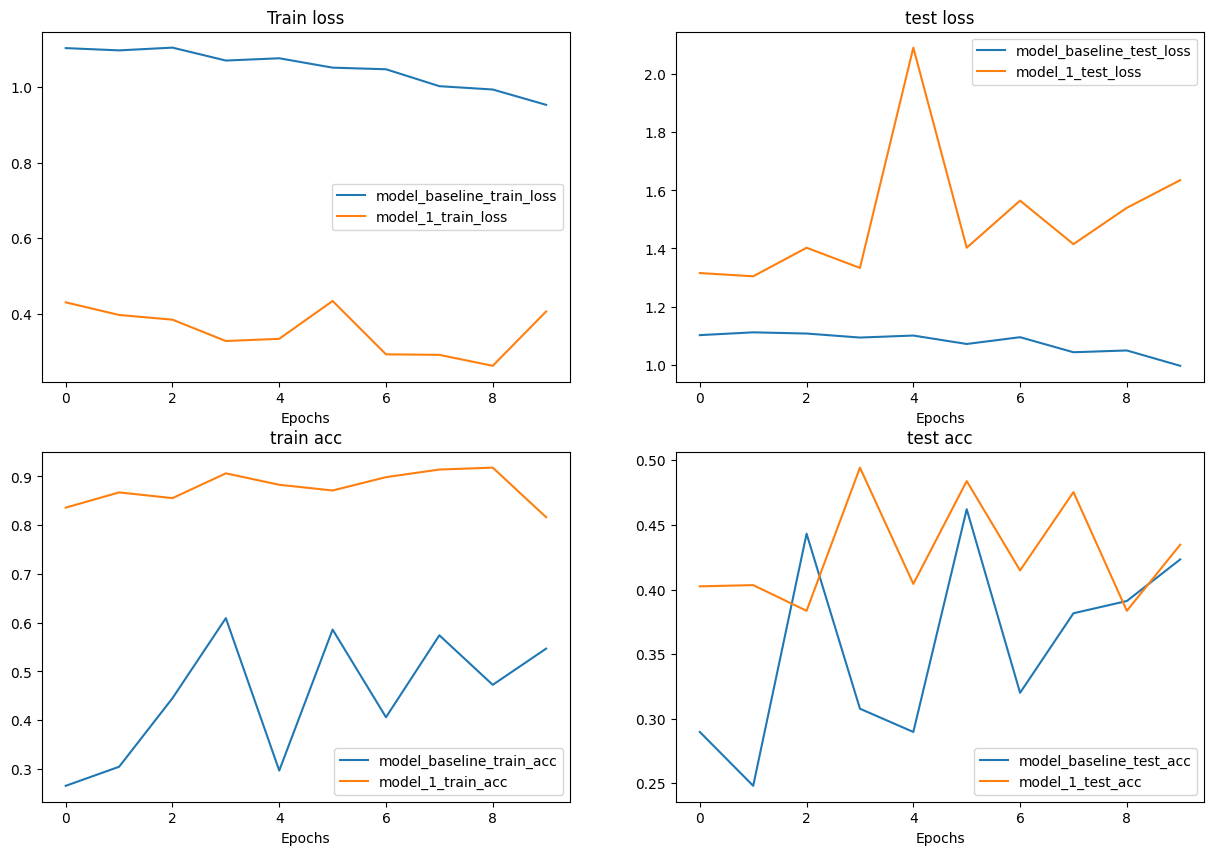

In [ ]:
plt.figure(figsize = (15,10))

epochs = range(len(model_0_df))

# train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label = "model_baseline_train_loss")
plt.plot(epochs, model_1_df["train_loss"], label = "model_1_train_loss")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

# test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label = "model_baseline_test_loss")
plt.plot(epochs, model_1_df["test_loss"], label = "model_1_test_loss")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()

# train Accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label = "model_baseline_train_acc")
plt.plot(epochs, model_1_df["train_acc"], label = "model_1_train_acc")
plt.title("train acc")
plt.xlabel("Epochs")
plt.legend()

# test Accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label = "model_baseline_test_acc")
plt.plot(epochs, model_1_df["test_acc"], label = "model_1_test_acc")
plt.title("test acc")
plt.xlabel("Epochs")
plt.legend()

## Making a prediction on a custom image (not in test nor train)

In [ ]:
import requests

custom_image_path = data_path / "04-pizza-dad.jpeg"

if not custom_image_path.is_file():
  with open(custom_image_path, "wb") as f:
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/data/04-pizza-dad.jpeg")
    print(f"Downloading {custom_image_path}...")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists")


### Loading in a custom image with PyTorch
* Check if data is in tensor form with datatype(torch.float32)
* Of shape 64x64x3
* On the right device

Shape: torch.Size([3, 4032, 3024])
Datatype: torch.uint8
Device: cpu


(np.float64(-0.5), np.float64(3023.5), np.float64(4031.5), np.float64(-0.5))

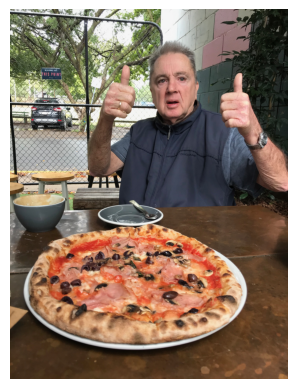

In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
print(f"Shape: {custom_image_uint8.shape}")
print(f"Datatype: {custom_image_uint8.dtype}")
print(f"Device: {custom_image_uint8.device}")

plt.imshow(custom_image_uint8.permute(1, 2, 0))
plt.axis(False)

### Making a prediction on a custom image with a trained PyTorch model

In [ ]:
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32) / 255
custom_image

tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..., 0.0549, 0.0510, 0.

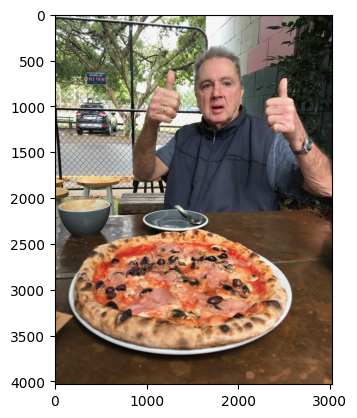

In [ ]:
plt.imshow(custom_image.permute(1, 2, 0))

In [ ]:
# Transfomr pipeline to resize image
from torchvision import transforms

custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64))
])

torch.Size([3, 64, 64])

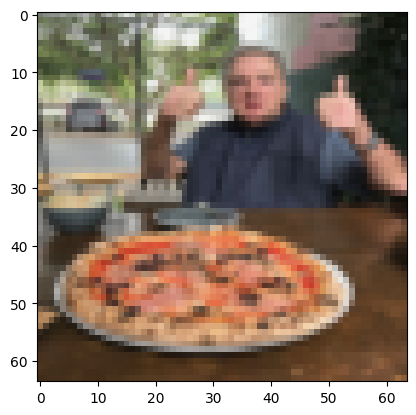

In [ ]:
custom_image_transformed = custom_image_transform(custom_image)
plt.imshow(custom_image_transformed.permute(1, 2, 0))
custom_image_transformed.shape

In [ ]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [ ]:
custom_image_transformed.unsqueeze(dim = 0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim = 0)) # Matrix multiplication issue because of a missing batch dim
custom_image_pred

tensor([[-0.7242, -1.6038, -3.1001]])

In [ ]:
# logits -> prediction probabilites
custom_image_pred_probs = torch.softmax(custom_image_pred, dim = 1)
custom_image_pred_probs

tensor([[0.6632, 0.2752, 0.0616]])

In [ ]:
# prediction probabilites -> labesl
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim = 1)
custom_image_pred_label

tensor([0])

In [ ]:
class_names, class_dict, class_dict.keys()

(['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 dict_keys(['pizza', 'steak', 'sushi']))

In [ ]:
class_names[custom_image_pred_label]

'pizza'

### Make predictions on custom images functionalized

In [ ]:
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform = None,
                        device = device):
  """
  Makes a prediction on a target with a trained model and plots the image and prediction
  """
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
  target_image = target_image / 255.
  if transform:
    target_image = transform(target_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    target_image = target_image.unsqueeze(dim = 0)
    target_image_pred = model(target_image.to(device))

  target_image_pred_probs = torch.softmax(target_image_pred, dim = 1)
  target_image_pred_label = torch.argmax(target_image_pred_probs, dim = 1)

  plt.imshow(target_image.squeeze().permute(1, 2, 0))
  plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")

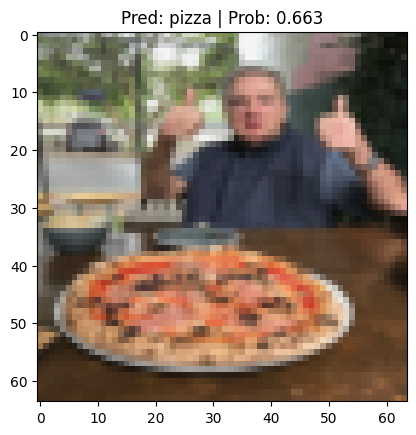

In [ ]:
pred_and_plot_image(model_1, custom_image_path, class_names, custom_image_transform, device)